In [120]:
import pandas as pd
import numpy as np
import re # neteja strings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE  # SMOTE per a la sobre-mostració de les classes minoritàries
from imblearn.ensemble import BalancedRandomForestClassifier  # Random Forest balancejat

import warnings

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

In [121]:
ruta_archivo = r"C:\Users\thais\Documents\00_MACHINE_LEARNING\PROVA TECNICA DATA SCIENCE\LOCALES.csv"
df_0 = pd.read_csv(ruta_archivo, low_memory=False)
df_0.head()

,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,53938.0,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,574888.0,32.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272432DF3827C,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,53941.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,159607.0,22.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272422DF3827C,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,53918.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,307364.0,8.0,92663.0,47,60,Sant Andreu,9,Sant Andreu,2272908DF3827A,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,53964.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,142660.0,22.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173822DF3827C,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,53967.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,142661.0,23.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173823DF3827C,2021-06-22


In [122]:
for col in df_0.columns:
    print(col)

ID_Global
ID_Bcn_2016
Codi_Principal_Activitat
Nom_Principal_Activitat
Codi_Sector_Activitat
Nom_Sector_Activitat
Codi_Grup_Activitat
Nom_Grup_Activitat
Codi_Activitat_2022
Nom_Activitat
Codi_Activitat_2016
Nom_Local
SN_Oci_Nocturn
SN_Coworking
SN_Servei_Degustacio
SN_Obert24h
SN_Mixtura
SN_Carrer
SN_Mercat
Nom_Mercat
SN_Galeria
Nom_Galeria
SN_CComercial
Nom_CComercial
SN_Eix
Nom_Eix
X_UTM_ETRS89
Y_UTM_ETRS89
Latitud
Longitud
Direccio_Unica
Codi_Via
Nom_Via
Planta
Porta
Num_Policia_Inicial
Lletra_Inicial
Num_Policia_Final
Lletra_Final
Solar
Codi_Parcela
Codi_Illa
Seccio_Censal
Codi_Barri
Nom_Barri
Codi_Districte
Nom_Districte
Referencia_Cadastral
Data_Revisio


In [123]:
df_0.describe()

,ID_Bcn_2016,Codi_Principal_Activitat,Codi_Sector_Activitat,Codi_Grup_Activitat,Codi_Activitat_2022,X_UTM_ETRS89,Y_UTM_ETRS89,Latitud,Longitud,Codi_Via,Porta,Num_Policia_Inicial,Num_Policia_Final,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Codi_Districte
count,58019.000000,66088.000000,66088.000000,66088.000000,6.608800e+04,66088.000000,6.608800e+04,66088.000000,66088.000000,66088.000000,63045.000000,66087.000000,66080.000000,65984.000000,65995.000000,65995.000000,66088.000000,66088.000000,66088.000000
mean,41604.459281,0.891357,1.859127,9.314565,2.088482e+06,430216.161921,4.583622e+06,41.401108,2.165168,198961.478650,22.315425,111.508950,112.500953,248327.657659,11.714933,47695.592242,59.814974,28.587051,5.036784
std,21743.719055,0.311193,0.691582,6.531307,2.000116e+06,1813.057666,2.227813e+03,0.020138,0.021571,130999.057107,28.925042,152.019128,149.627018,181510.596868,12.269607,30979.495278,40.244692,22.348009,3.066499
min,4215.000000,0.000000,1.000000,0.000000,1.000000e+01,423799.475627,4.577403e+06,41.344821,2.088023,306.000000,3.000000,0.000000,0.000000,792.000000,1.000000,5010.000000,1.000000,1.000000,1.000000
25%,22656.500000,1.000000,1.000000,2.000000,1.100000e+06,428867.120040,4.581804e+06,41.384713,2.149168,94118.500000,10.000000,17.000000,18.000000,120438.750000,3.000000,20990.000000,28.000000,8.000000,2.000000
50%,41710.000000,1.000000,2.000000,12.000000,1.600102e+06,430271.649691,4.583432e+06,41.399378,2.165895,187207.000000,10.000000,53.000000,54.000000,147243.000000,9.000000,40470.000000,53.000000,25.000000,5.000000
75%,61466.500000,1.000000,2.000000,16.000000,1.700600e+06,431467.576602,4.584965e+06,41.413293,2.180025,288626.500000,20.000000,153.000000,155.000000,306026.000000,16.000000,80570.000000,83.000000,45.000000,8.000000
max,78056.000000,1.000000,3.000000,17.000000,9.000000e+06,434876.705365,4.590873e+06,41.466530,2.220789,701801.000000,900.000000,9999.000000,9999.000000,583998.000000,302.000000,99535.000000,237.000000,73.000000,10.000000


_No té sentit els valors estadístics de la descripció quan bàsicament ens estem referint a codis relacionats amb les categories_

In [124]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Global                 66088 non-null  object 
 1   ID_Bcn_2016               58019 non-null  float64
 2   Codi_Principal_Activitat  66088 non-null  int64  
 3   Nom_Principal_Activitat   66088 non-null  object 
 4   Codi_Sector_Activitat     66088 non-null  int64  
 5   Nom_Sector_Activitat      66088 non-null  object 
 6   Codi_Grup_Activitat       66088 non-null  int64  
 7   Nom_Grup_Activitat        66088 non-null  object 
 8   Codi_Activitat_2022       66088 non-null  int64  
 9   Nom_Activitat             66088 non-null  object 
 10  Codi_Activitat_2016       66088 non-null  object 
 11  Nom_Local                 66088 non-null  object 
 12  SN_Oci_Nocturn            66088 non-null  object 
 13  SN_Coworking              66088 non-null  object 
 14  SN_Ser

_Bàsicament observem un df amb categories i còdis, per un estudi que permetrà una classificació supervisada però no regressions numèriques_

# 1. Anàlisi Descriptiva Inicial #

### 1. Estructura del DataFrame ###
El conjunt de dades consta de 66.088 registres amb 49 columnes. De les columnes disponibles, algunes contenen dades numèriques (bàsicament codis), altres són de tipus objecte (cadenes de text) i també hi ha columnes amb valors nuls.   
Cada registre és únic i conté característiques sobretot d'ubicació i d'activitat comercial.

### 2. Descripció general de les columnes ###
A continuació, es proporciona una descripció general de les columnes clau i les seves característiques:
ID_Global: Identificador únic per cada registre.   
ID_Bcn_2016: Identificador de l'activitat a la ciutat de Barcelona (algunes files tenen valors nuls).   
Codi_Principal_Activitat, Codi_Sector_Activitat, Codi_Grup_Activitat, Codi_Activitat_2022: Còdigs que identifiquen la categoria i subcategoria de l'activitat econòmica del local. Aquests valors són numèrics i els agruparem per analitzar l'activitat comercial.  
Nom_Principal_Activitat, Nom_Sector_Activitat, Nom_Grup_Activitat, Nom_Activitat: Noms que descriuen les activitats comercials i el seu sector. Són columnes de tipus objecte (cadenes de text).  

Coordenades geogràfiques (Latitud, Longitud): Permeten la geolocalització dels establiments.    
Ubicació (Codi_Via, Nom_Via, Codi_Barri, Nom_Barri, Codi_Districte, Nom_Districte): Dades sobre la localització i districte del local.
Altres dades de localització i estructurals (Planta, Porta, Num_Policia_Inicial, Num_Policia_Final): Dades relacionades amb la localització específica del local dins de l'edifici i la seva identificació legal.  

Tipus d'establiment (p. ex., SN_Oci_Nocturn, SN_Coworking, SN_Servei_Degustacio): Dades categòriques per identificar si un local té característiques especials (oci nocturn, coworking, etc.).   

### 3. Estadístiques Descriptives Generals ###  
Les següents estadístiques es basen en les columnes numèriques de les dades:  
ID_Bcn_2016: Els valors de l'ID_Bcn_2016 varien entre 4215 i 78056, però no els utilitzarem degut al gran nombre de valors faltants i ja tenim un altra ID únic.  

Coordenades UTM (X_UTM_ETRS89, Y_UTM_ETRS89), Latitud i Longitud: Les coordenades UTM tenen valors molt específics que ajuden a identificar les ubicacions a la ciutat de Barcelona.

Codi_Via i Porta: Aquestes columnes ofereixen la informació sobre les vies i les portes dels locals. Tanmateix, la columna de "Porta" té alguns valors nuls, que gestionarem posteriorment.

Solar, Codi_Parcela, Codi_Illa: Són codis utilitzats per identificar el solar i la parcel·la associada a cada local. 
Num_Policia_Inicial, Num_Policia_Final: Aquestes columnes mostren els rangs d'adreça per número de policia. ens poden orientar millor que el num porta.

### 4. Manca de Dades i valors nuls ### 
Algunes columnes contenen valors nuls en una proporció significativa de les files:   

Nom_Mercat: Aquesta columna conté només 2.154 valors no nuls, mentre que la resta estan nuls. Això pot indicar que només una part dels establiments estan en mercats.   
Nom_Galeria i Nom_CComercial: Similarment, aquestes columnes tenen valors nuls en moltes files, però no necessitem aquestes variables per l'estudi.   
Porta, Num_Policia_Inicial, Num_Policia_Final: Algunes d'aquestes dades tenen valors nuls, manca d'una identificació precisa en determinades ubicacions.

El conjunt de dades conté algunes columnes amb una proporció relativament alta de valors nuls. És important netejar o imputar aquests valors abans de continuar amb l'anàlisi. Les columnes s'han de revisar.

### 5. Tipus de Dades ###
Dades numèriques: Aquests inclouen les coordenades UTM, latitud, longitud, així com algunes altres dades d’identificació com el Codi_Via.   
Dades de text: Els noms de les activitats, sectors, grups d'activitat i altres elements descriptius.   
Dades booleanes: Dades com SN_Oci_Nocturn, SN_Coworking, SN_Servei_Degustacio indiquen la presència o absència de característiques específiques dels locals. 

In [125]:
(df_0.isna().sum().sum(), df_0.isnull().sum().sum(), df_0.loc[df_0.duplicated()].sum().sum())
nulos_por_columna = df_0.isnull().sum()
print(nulos_por_columna[nulos_por_columna > 0])

ID_Bcn_2016              8069
Nom_Mercat              63934
Nom_Galeria             65774
Nom_CComercial          65245
Nom_Eix                 45406
Porta                    3043
Num_Policia_Inicial         1
Lletra_Inicial          64026
Num_Policia_Final           8
Lletra_Final            64126
Solar                     104
Codi_Parcela               93
Codi_Illa                  93
Referencia_Cadastral       93
dtype: int64


# 2. Neteja inicial del DataFrame #

En el procés de neteja, podem considerar prescindir de les columnes amb una quantitat elevada de valors nuls sempre i quant no siguin rellevants per l'anàlisi: 

### Columnes amb gairebé tots els valors nuls: ### 

Nom_Galeria: Té 65,774 valors nuls de 66,088 files. No necessitem aquesta informació per l'estudi.  
Nom_CComercial: Té 65,245 valors nuls. No necessitem aquesta informació per l'estudi.  
Lletra_Inicial i Lletra_Final: Aquestes dues columnes tenen més de 64,000 valors nuls cadascuna. No necessitem aquesta precisió en l’adreça de l’establiment.  
### Columnes amb presència limitada de dades específiques: ###

Nom_Mercat: Amb 63,934 valors nuls, no és necessari tenir el nom específic dels mercats per als establiments, doncs l'estudi serà més global per barris i districtes.     
Nom_Eix: Aquesta columna dóna informació adicional però tenin la posició geogràfica i tenint tants valors nuls, millor excloure-la, ja que té 45,406 valors nuls.  

### Columnes amb valors geoespacials duplicats o opcionalment prescindibles: ###

Porta: No és necessari per a l’anàlisi de la ubicació exacta de cada establiment.
Solar, Codi_Parcela, Codi_Illa, Referencia_Cadastral: Aquestes són molt específiques per identificar. Si ens hagués fallat l'ID únic, haguéssim hagut potser d'utilitzar-les, doncs per exempla la referència cadastrals és única. Però com no és el cas, l'eliminarem.  

### Columnes amb gairebé cap valor nul però que podrien no ser crítiques segons l’anàlisi: ###

ID_Bcn_2016: Tot i que és un identificador, l'exclourem, ja es té ID_Global com a identificador únic.
Num_Policia_Inicial i Num_Policia_Final: Són útils per a la identificació exacta de la direcció, però no necessitem tanta precisió. 

_DE TOTES MANERES, VULL MANTENIR EL DF_NET, SENSE NULS I DESPRÉS JA PROCEDIRÉ A ELIMINAR COLUMNES PER SI POSTERIORMENT A LES MÈTRIQUES OBTINGUDES A L'ESTUDI (SUPOSEM CASOS DE MULTICOLINEALITAT O ALTRES), RECONSIDERÉS INCLOURE-LES._  

In [182]:
df_net=df_0.copy()

In [183]:
# De moment, així com ID bcn seria un focus de multicolinealitat, la eliminarem, igual que porta, els codis i solar tampoc i lareferencia cadastral tampoc la considerarem guardar. Donat que la majoria de Nuls es situen en quan s'ha dividit la variable Nom, entenc que no aplica, doncs si està en un mercat, no està en una galeria o eix comercial.
nom_columns = [
    'Nom_Mercat', 'Nom_Galeria', 'Nom_CComercial', 'Nom_Eix', 
    'Solar', 'Codi_Parcela','Codi_Illa'
]
df_net[nom_columns] = df_net[nom_columns].fillna('No aplica')

In [184]:
# Omplim valors nuls 'Num_Policia_Inicial' amb valors de 'Num_Policia_Final'
df_net['Num_Policia_Inicial'] = df_net['Num_Policia_Inicial'].fillna(df_net['Num_Policia_Final'])

# Omplim valors nuls'Num_Policia_Final' amb valores de 'Num_Policia_Inicial'
df_net['Num_Policia_Final'] = df_net['Num_Policia_Final'].fillna(df_net['Num_Policia_Inicial'])

In [185]:
# Identificar les files on qualsevol de les dues columnes és nul·la
files_nuls_any = df_net[df_net['Num_Policia_Inicial'].isnull() | df_net['Num_Policia_Final'].isnull()]
files_nuls_any

,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
19922,330d4e41-029a-4673-95b9-56e016e4a3f5,30886.0,1,Actiu,2,Serveis,16,Altres,1600600,Perruqueries,...,82745.0,18.0,82510.0,63,31,la Vila de Gràcia,6,Gràcia,0142218DF3804A,2021-03-05


In [186]:
# Eliminem les dos columnes que tenen valors nuls però que estem segurs que no necessitar
df_net = df_net.drop(columns=['Referencia_Cadastral','ID_Bcn_2016','Lletra_Inicial', 'Lletra_Final','Porta'])

In [187]:
df_net.loc[19922, 'Num_Policia_Inicial'] = 10
df_net.loc[19922, 'Num_Policia_Final'] = 10

In [188]:
# Comprovar si hi ha valors nuls a tot el DataFrame
missing_values = df_net.isnull().sum()
# Comprovar si hi ha valors nuls en tot el DataFrame (sumant tots els nuls)
if missing_values.sum() == 0:
    print("No hi ha valors nuls a tot el DataFrame.")
else:
    print("Hi ha valors nuls a alguna columna.")


No hi ha valors nuls a tot el DataFrame.


In [189]:
# Comprovar si hi ha duplicats al DataFrame
duplicates = df_net.duplicated().sum()
print(f"Nombre de duplicats: {duplicates}")
# Si vols eliminar els duplicats, pots fer-ho així:
df_net = df_net.drop_duplicates()

Nombre de duplicats: 0


In [190]:
df_net['Planta'].unique()

array(['LOC'], dtype=object)

In [191]:
df_net = df_net.drop(columns=['Planta'])

In [192]:
# Guardar el DataFrame df_net com a fitxer CSV
df_net.to_csv('df_net_guardat.csv', index=False) 

In [193]:
# Iterar per cada columna del DataFrame i mostrar els valors únics
for column in df_net.columns:
    print(f"Valors únics de la columna {column}:")
    print(df_net[column].unique())
    print("-" * 50)  # Separador per llegir millor els resultats


Valors únics de la columna ID_Global:
['2577e29a-b8d7-41f9-b751-49507d679c94'
 'a2463c00-b817-408f-ad31-cf32c08ca00a'
 '47706876-da40-4fc8-b1dd-03730ca86205' ...
 'd573ced5-9d22-4125-8654-5cfd79907996'
 '968cb78f-d18f-47ff-abc7-9d253a19006b'
 '2ca07294-ab0a-42fe-b188-ca9a49e26d08']
--------------------------------------------------
Valors únics de la columna Codi_Principal_Activitat:
[1 0]
--------------------------------------------------
Valors únics de la columna Nom_Principal_Activitat:
['Actiu' 'Sense activitat Econòmica']
--------------------------------------------------
Valors únics de la columna Codi_Sector_Activitat:
[2 3 1]
--------------------------------------------------
Valors únics de la columna Nom_Sector_Activitat:
['Serveis' 'Altres' 'Comerç al detall' 'Locals buits en venda i lloguer'
 'Locals buits en venda' 'Locals buits en lloguer'
 'Comerç al detall /Engròs']
--------------------------------------------------
Valors únics de la columna Codi_Grup_Activitat:
[16  

### Conversions de formats ###

In [194]:
df_net['Data_Revisio'] = pd.to_datetime(df_net['Data_Revisio'], errors='coerce')

In [195]:
# !pip install unicode

In [196]:
# Mostra les columnes que són de tipus object
cols_object = df_net.select_dtypes(include='object').columns.tolist()

# Imprimir les columnes de tipus object per revisar
print("Columns of type 'object':", cols_object)

Columns of type 'object': ['ID_Global', 'Nom_Principal_Activitat', 'Nom_Sector_Activitat', 'Nom_Grup_Activitat', 'Nom_Activitat', 'Codi_Activitat_2016', 'Nom_Local', 'SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'Nom_Mercat', 'SN_Galeria', 'Nom_Galeria', 'SN_CComercial', 'Nom_CComercial', 'SN_Eix', 'Nom_Eix', 'Direccio_Unica', 'Nom_Via', 'Solar', 'Codi_Parcela', 'Codi_Illa', 'Nom_Barri', 'Nom_Districte']


In [197]:
# Llista amb Strings a netejar
cols_to_clean = [
    'Nom_Principal_Activitat', 'Nom_Sector_Activitat', 'Nom_Grup_Activitat', 
    'Nom_Activitat', 'Nom_Local', 'Nom_Mercat', 'Nom_Galeria', 
    'Nom_CComercial', 'Nom_Eix', 'Direccio_Unica', 'Nom_Via', 
    'Nom_Barri', 'Nom_Districte'
]
# Neteja de caràcters especials i errors tipogràfics a les columnes especificades
for col in cols_to_clean:
    if col in df_net.columns:
        print(f"\nProcessing column: {col}")
        
        # 1. Eliminar caràcters especials i accents utilitzant re.sub per mantenir només lletres i números
        df_net[col] = df_net[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))  # Elimina caràcters especials
        
        # 2. Convertir els noms a minúscules per tenir consistència
        df_net[col] = df_net[col].apply(lambda x: x.strip().lower())  # Elimina espais extra i passa a minúscules
        
        # 3. Eliminar espais extra en les cadenes
        df_net[col] = df_net[col].apply(lambda x: re.sub(r'\s+', ' ', x))  # Substitueix múltiples espais per un sol espai


Processing column: Nom_Principal_Activitat

Processing column: Nom_Sector_Activitat

Processing column: Nom_Grup_Activitat

Processing column: Nom_Activitat

Processing column: Nom_Local

Processing column: Nom_Mercat

Processing column: Nom_Galeria

Processing column: Nom_CComercial

Processing column: Nom_Eix

Processing column: Direccio_Unica

Processing column: Nom_Via

Processing column: Nom_Barri

Processing column: Nom_Districte


In [111]:
# import pyproj

In [198]:
cols_to_drop = ['Codi_Activitat_2016', 'Solar', 'Codi_Parcela', 'Codi_Illa']
df_net_cleaned = df_net.drop(columns=cols_to_drop)

In [13]:
# convertir a int esl 0/1 de les variables que ara mateix són objecte 
cols_01 = ['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura',
        'SN_Carrer', 'SN_Mercat', 'SN_Galeria', 'SN_CComercial', 'SN_Eix']
for col in cols_01:
    df_net[col] = df_net[col].map({'Sí': 1, 'No': 0})  # Substituir 'Sí' per 1 i 'No' per 0

In [161]:
df_net['Data_Revisio'] = pd.to_datetime(df_net['Data_Revisio'])
df_net['Data_Revisio'] = df_net['Data_Revisio'] .dt.strftime('%d-%m-%Y') # donem format a la data

In [200]:
df_net.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_Global                 66088 non-null  object        
 1   Codi_Principal_Activitat  66088 non-null  int64         
 2   Nom_Principal_Activitat   66088 non-null  object        
 3   Codi_Sector_Activitat     66088 non-null  int64         
 4   Nom_Sector_Activitat      66088 non-null  object        
 5   Codi_Grup_Activitat       66088 non-null  int64         
 6   Nom_Grup_Activitat        66088 non-null  object        
 7   Codi_Activitat_2022       66088 non-null  int64         
 8   Nom_Activitat             66088 non-null  object        
 9   Codi_Activitat_2016       66088 non-null  object        
 10  Nom_Local                 66088 non-null  object        
 11  SN_Oci_Nocturn            66088 non-null  object        
 12  SN_Coworking      

In [ ]:
# Seleccionar les columnes de tipus float
float_columns = df_net.select_dtypes(include=['float64', 'float32']).columns

# Mostrar els valors únics de cada columna float
unique_values_float_columns = {col: df_net[col].unique() for col in float_columns}
print(unique_values_float_columns)

In [92]:
# Revisar les columnes booleanes per revisar que estiguin correctes
df_net[['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio','SN_Obert24h','SN_Mixtura','SN_Carrer','SN_Mercat','SN_Galeria','SN_CComercial','SN_Eix']].apply(lambda x: x.unique())

,SN_Oci_Nocturn,SN_Coworking,SN_Servei_Degustacio,SN_Obert24h,SN_Mixtura,SN_Carrer,SN_Mercat,SN_Galeria,SN_CComercial,SN_Eix
0,No,No,No,No,No,Sí,No,No,No,No
1,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí


In [23]:
# Revisar les coordenades UTM per comprobar que no hi ha dades incoherents
df_net[['X_UTM_ETRS89', 'Y_UTM_ETRS89']].describe()

,X_UTM_ETRS89,Y_UTM_ETRS89
count,66088.000000,6.608800e+04
mean,430216.161921,4.583622e+06
std,1813.057666,2.227813e+03
min,423799.475627,4.577403e+06
25%,428867.120040,4.581804e+06
50%,430271.649691,4.583432e+06
75%,431467.576602,4.584965e+06
max,434876.705365,4.590873e+06


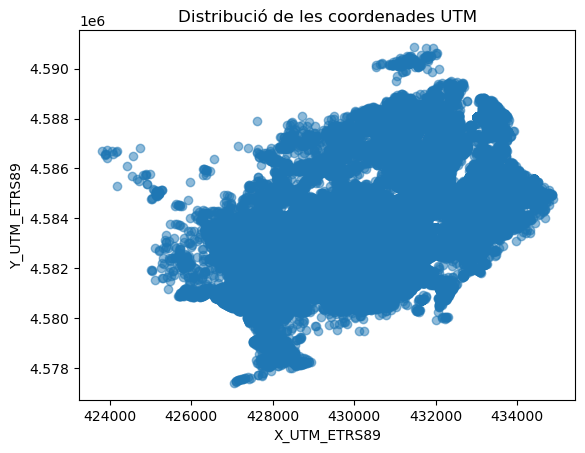

In [24]:
# visualització de les coordenades
plt.scatter(df_net['X_UTM_ETRS89'], df_net['Y_UTM_ETRS89'], alpha=0.5)
plt.title("Distribució de les coordenades UTM")
plt.xlabel("X_UTM_ETRS89")
plt.ylabel("Y_UTM_ETRS89")
plt.show()

In [25]:
# !pip install pyproj

### Visualització de les correlacions numèriques ###    
tot i saber que en aquest dataframe prevaleixen les categòriques, doncs les numèriques només són referències d'ubicació o d'activitat:

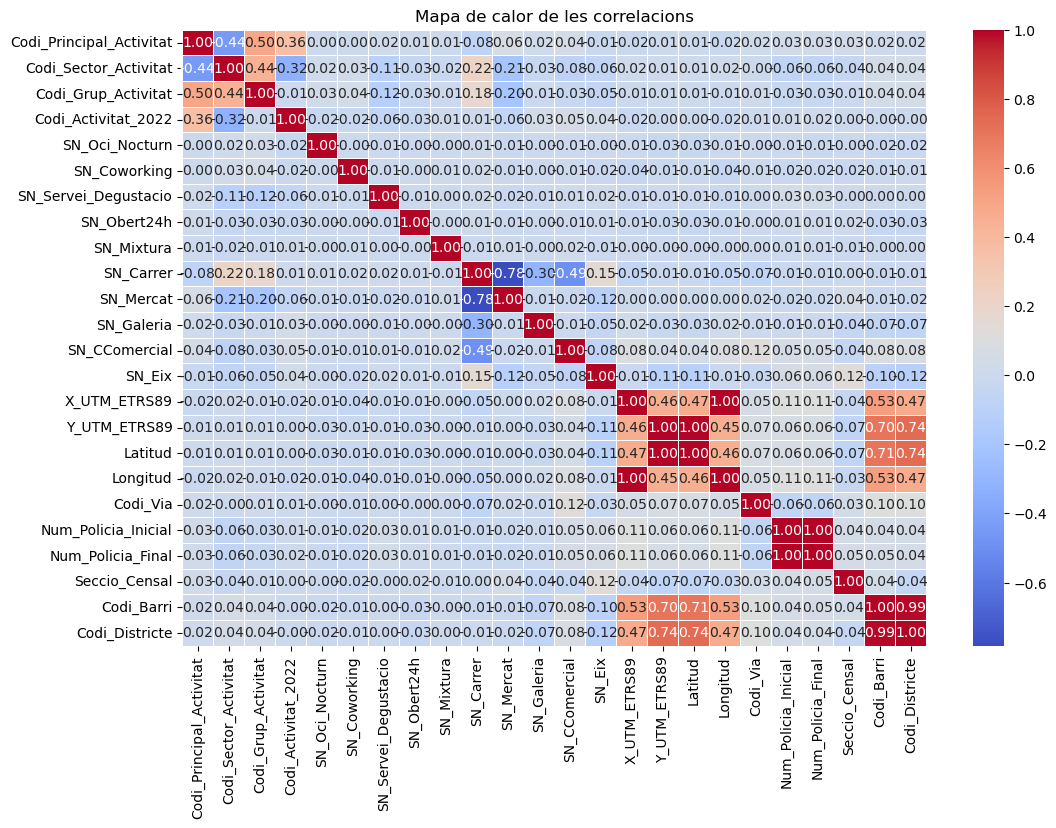

In [41]:
# Seleccionar només les columnes numèriques
df_net_numeric = df_net.select_dtypes(include=[float, int])

# Calcular la correlació entre les columnes numèriques
corr = df_net_numeric.corr()

# Crear un mapa de calor de les correlacions
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de les correlacions')
plt.show()

_Només veiem correlacions llògiques com codi barri amb codi districte, o num inici i fi del carrer, i les de ubicació (codi UTM i Latitud/Longitud). I en sentit negatiu, doncs el normal: si un local està al carrer, no està al mercat ni a un cc comercial... Així que no tenim cap informació rellevant._

# 3. Primeres Visualitzacions EDA #

## 3.1. Distribució d'Establiments per Sector i Grup d'Activitat ##

In [31]:
df_net['Nom_Sector_Activitat'].unique()

array(['Serveis', 'Altres', 'Comerç al detall',
       'Locals buits en venda i lloguer', 'Locals buits en venda',
       'Locals buits en lloguer', 'Comerç al detall /Engròs'],
      dtype=object)

In [35]:
df_net['Nom_Grup_Activitat'].unique()

array(['Altres', 'Ensenyament',
       'Reparacions (Electrodomèstics i automòbils)',
       'Sanitat i assistència', 'Grup no definit', 'Automoció',
       'Equipament personal',
       'Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)',
       'Quotidià alimentari', 'Quotidià no alimentari',
       'Equipaments culturals i recreatius', 'Parament de la llar',
       'Oci i cultura', 'Finances i assegurances',
       'Activitats immobiliàries', 'Manteniment, neteja i producció'],
      dtype=object)

In [204]:
df_net['Nom_Activitat'].unique()

array(['Altres', 'Activitats de la construcció', 'Arranjaments',
       'Farmàcies PARAFARMÀCIA', 'Material equipament llar',
       'Serveis de telecomunicacions', 'Restaurants', 'Calçat i pell',
       'Joieria, rellotgeria i bijuteria', 'Ensenyament',
       'Activitats de transport',
       'Locals buits en venda i lloguer – reanalisi',
       'Autoservei / Supermercat', 'Combustibles i carburants',
       'Serveis a les empreses i oficines', 'Arts gràfiques',
       'Veterinaris / Mascotes', "Centres d'estètica",
       'Mobles i articles fusta i metall', 'Ous i aus',
       'Activitats immobiliàries', 'Plats preparats (no degustació)',
       'Perruqueries', 'Joguines i esports', 'Pa, pastisseria i làctics',
       'Altres equipaments esportius', 'Llibres, diaris i revistes',
       'Locals buits en venda i lloguer', 'Fruites i verdures',
       'Pàrquings i garatges', 'Sanitat i assistència',
       'Bars / CIBERCAFÈ', 'Equipaments culturals i recreatius',
       'Finances i ass

In [43]:
# noves categories
mapping = {
    'Ensenyament': 'Ensenyament',
    'Reparacions (Electrodomèstics i automòbils)': 'Reparacions i Manteniment',
    'Manteniment, neteja i producció': 'Reparacions i Manteniment',
    'Automoció': 'Reparacions i Manteniment',
    'Sanitat i assistència': 'Sanitat i assistència',
    'Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)': 'Restauració i Hostaleria',
    'Quotidià alimentari': 'Quotidià Alimentari',
    'Quotidià no alimentari': 'Quotidià No Alimentari',
    'Equipament personal': 'Equipament Personal i Llar',
    'Parament de la llar': 'Equipament Personal i Llar',
    'Equipaments culturals i recreatius': 'Equipaments Culturals i Recreatius i Oci',
    'Oci i cultura': 'Equipaments Culturals i Recreatius i Oci',
    'Finances i assegurances': 'Finances i Activitats Immobiliàries',
    'Activitats immobiliàries': 'Finances i Activitats Immobiliàries',
    'Altres': 'Altres i Grup No Definit',
    'Grup no definit': 'Altres i Grup No Definit'
}

# Aplicar el mapeig a la columna corresponent
df_net['Nom_Grup_Activitat_Agrupat'] = df_net['Nom_Grup_Activitat'].map(mapping)

# Comprovar els resultats de l'agrupació
df_net['Nom_Grup_Activitat_Agrupat'].value_counts()
# nova columna per quan la necessitem.

Nom_Grup_Activitat_Agrupat
Altres i Grup No Definit                    27873
Restauració i Hostaleria                    10722
Quotidià Alimentari                          7967
Equipament Personal i Llar                   6445
Equipaments Culturals i Recreatius i Oci     2533
Quotidià No Alimentari                       2486
Sanitat i assistència                        2093
Ensenyament                                  2066
Reparacions i Manteniment                    2005
Finances i Activitats Immobiliàries          1898
Name: count, dtype: int64

In [42]:
# Agrupa els valors que continguin "Locals buits" en una nova categoria "Locals buits"
df_net['Nom_Sector_Activitat'] = df_net['Nom_Sector_Activitat'].replace({
    'Locals buits en venda i lloguer': 'Locals buits',
    'Locals buits en venda': 'Locals buits',
    'Locals buits en lloguer': 'Locals buits'
})

# Comprova que els valors s'han agrupat correctament
print(df_net['Nom_Sector_Activitat'].unique())
# tenir en compte que el codi sector variarà. Però en principi no el necessitem perquè anem per categories.

['Serveis' 'Altres' 'Comerç al detall' 'Locals buits'
 'Comerç al detall /Engròs']


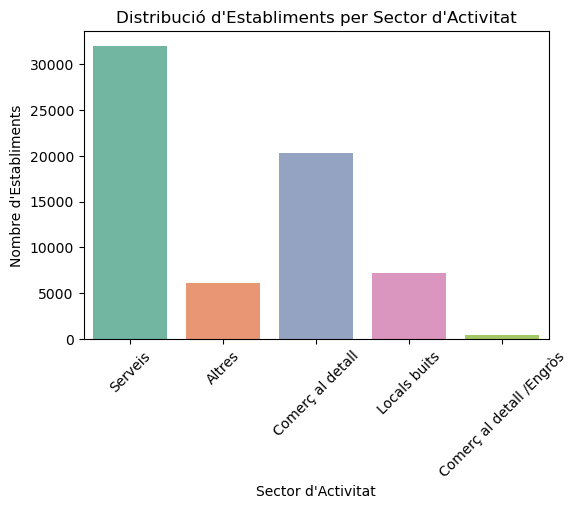

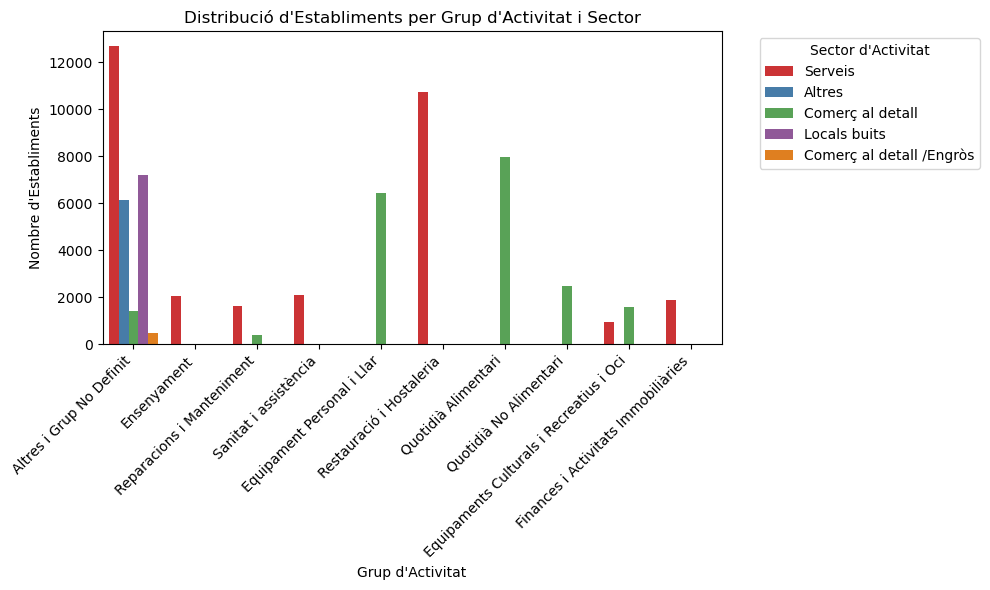

In [47]:
# Gràfica de barres per Nom_Sector_Activitat
plt.figure(figsize=(6,4))
sns.countplot(x='Nom_Sector_Activitat', data=df_net, palette='Set2')
plt.title('Distribució d\'Establiments per Sector d\'Activitat')
plt.xlabel('Sector d\'Activitat')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

# Gràfica de barres per Nom_Grup_Activitat dins de cada sector
plt.figure(figsize=(10,6))
sns.countplot(x='Nom_Grup_Activitat_Agrupat', hue='Nom_Sector_Activitat', data=df_net, palette='Set1')
plt.title('Distribució d\'Establiments per Grup d\'Activitat i Sector')
plt.xlabel('Grup d\'Activitat')
plt.ylabel('Nombre d\'Establiments')

# Ajustar les etiquetes de la barra X per evitar el solapament
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes a 45 graus i ajustar l'alineació horitzontal
plt.legend(title='Sector d\'Activitat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar el layout per evitar que es tallin les etiquetes
plt.show()



_Aquests gràfics de barres mostren com el sector de serveis és el que compta amb més número d'establiments, precedit pel comerç al detall. En el segon gràfic, observem a quin sector pertanyen les activitats i amb quina quantitat d'establiments._

## 3.2. Distribució Geogràfica d'Establiments Actius per Districte i Barri ##

### Gràfica de barres per districte i barri: ###

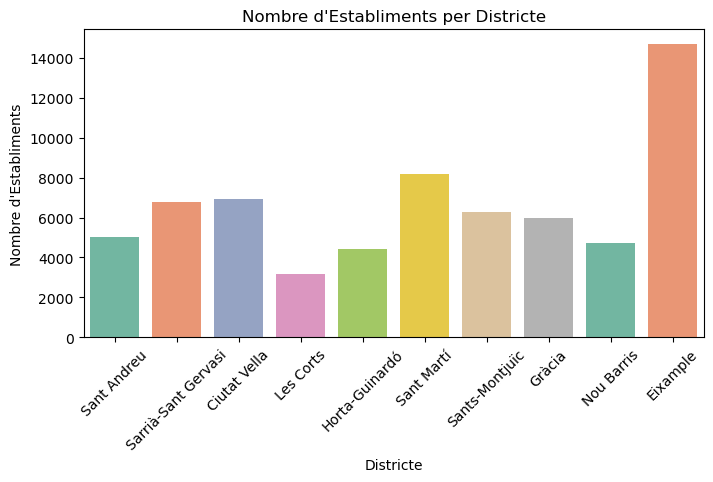

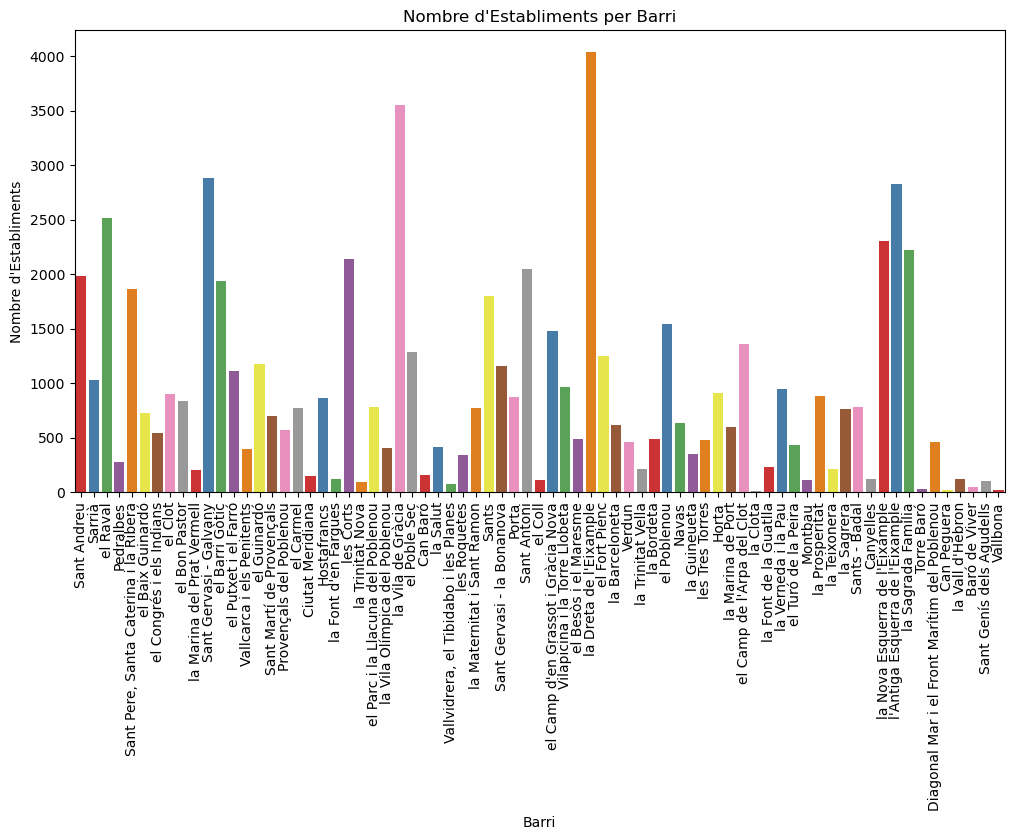

In [50]:
# Gràfica de barres per Nom_Districte
plt.figure(figsize=(8, 4))
sns.countplot(x='Nom_Districte', data=df_net, palette='Set2')
plt.title('Nombre d\'Establiments per Districte')
plt.xlabel('Districte')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

# Gràfica de barres per Nom_Barri
plt.figure(figsize=(12, 6))
sns.countplot(x='Nom_Barri', data=df_net, palette='Set1')
plt.title('Nombre d\'Establiments per Barri')
plt.xlabel('Barri')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=90)
plt.show()


_El districte on es concentren la majoria d'establiments és L'Eixample, contemplant els barris de la mateixa Eixample, seguint per Sagrada Familia, Gràcia, les Corts, Sant Gervasi i barri Gòtic._

### Comparativa de Tipus d'Establiments (Oci, Coworking, Degustació, etc.) ###
Per mostrar quins serveis estan presents en cada grup o districte.


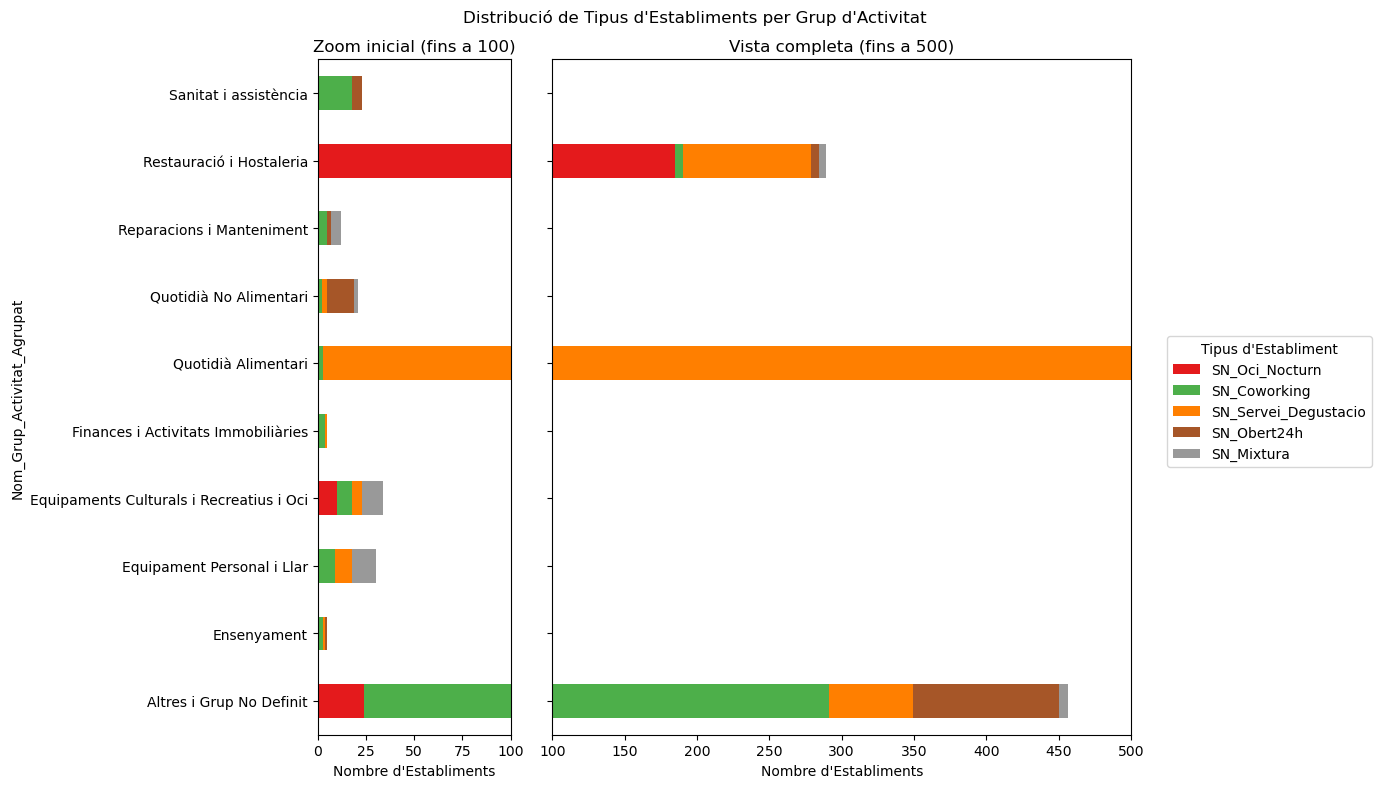

In [71]:
df_types = df_net[['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 
                   'SN_Obert24h', 'SN_Mixtura']]
df_types_grouped = df_types.groupby(df_net['Nom_Grup_Activitat_Agrupat']).sum()

# Crear la figura i les subtrames
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 8), gridspec_kw={'width_ratios': [1, 3]})

# Primera subtrama: mostrar només fins a un rang menor (per exemple, 100)
df_types_grouped.plot(kind='barh', stacked=True, ax=ax1, colormap='Set1', legend=False)
ax1.set_xlim(0, 100)
ax1.set_title('Zoom inicial (fins a 100)')
ax1.set_xlabel('Nombre d\'Establiments')

# Segona subtrama: mostrar el rang complet fins a 500
df_types_grouped.plot(kind='barh', stacked=True, ax=ax2, colormap='Set1', legend=False)
ax2.set_xlim(100, 500)
ax2.set_title('Vista completa (fins a 500)')
ax2.set_xlabel('Nombre d\'Establiments')

# Ajustar marges i llegenda
fig.suptitle('Distribució de Tipus d\'Establiments per Grup d\'Activitat')
plt.legend(title='Tipus d\'Establiment', bbox_to_anchor=(1.05, 0.6), loc='upper left')
plt.tight_layout()
plt.show()


_Podem observar que dins dels tipus d'establiments, tenim gran quantitat de coworkings en la secció altres, dels quals alguns oberts 24h. També podem comprobar que dins de la secció d'alimentari, molts són amb servei només de degustació (segurament els que no tenien sortida de fums i no han obtingut la licència de restaurant i molts forns, que ja sabem que han estat en tendència en els últims anys).  Dins de la secció de bars i hotels, trobem molts amb permís d'oci nocturn, sobretot hotels i alguns bars i restaurants._


### Comparativa per ubicació d'Establiments carrer, centre comercial, mercat, etc.) ###
Per mostrar la ubicació del local

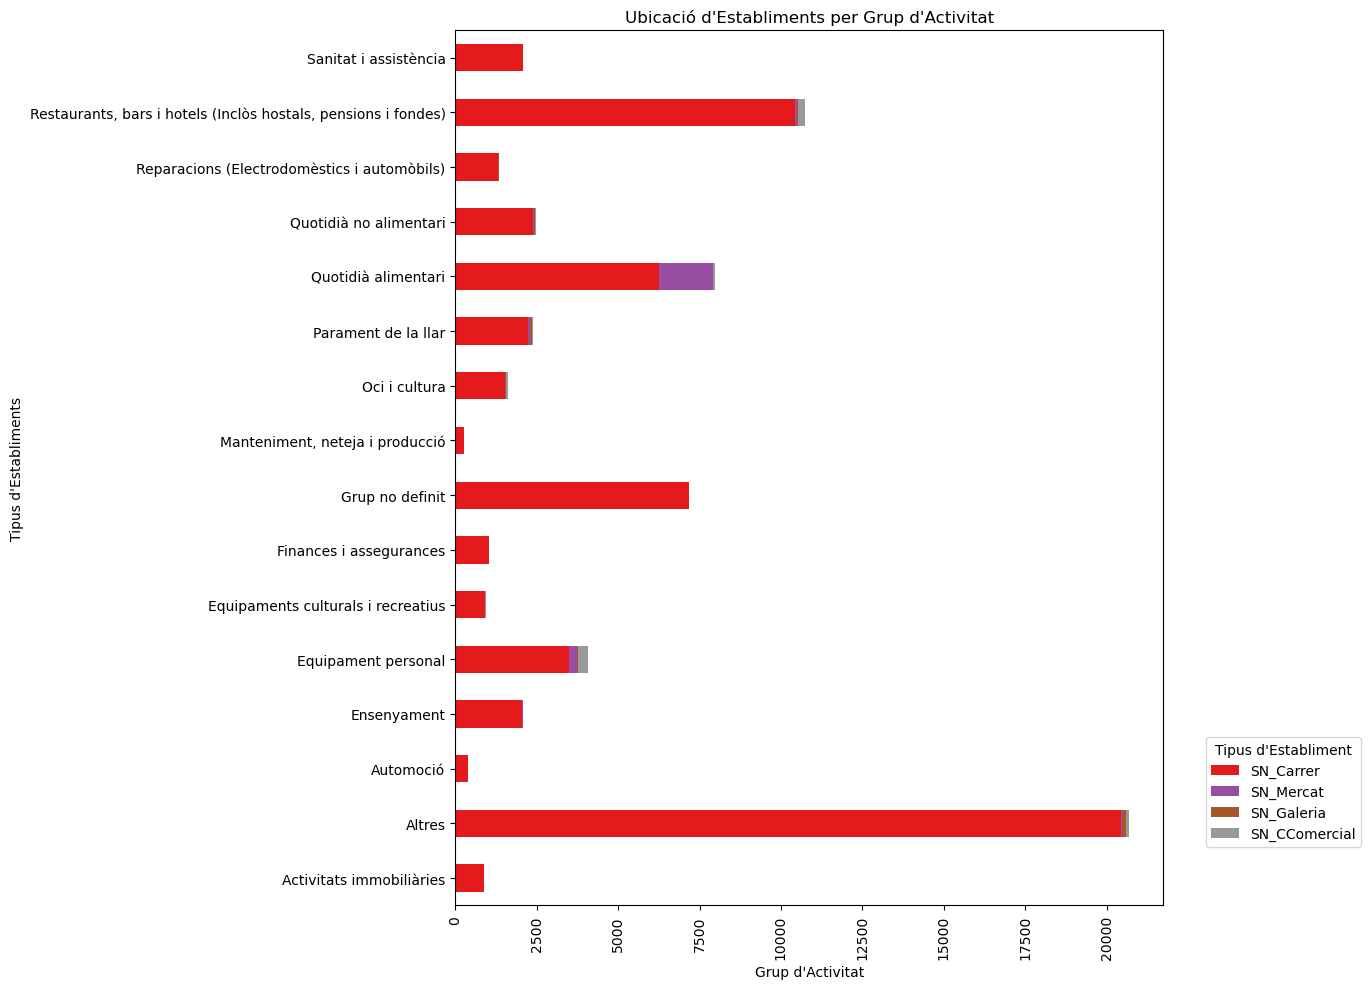

In [72]:
# variables de tipus d'establiment
df_types = df_net[['SN_Carrer', 'SN_Mercat', 'SN_Galeria', 
                   'SN_CComercial']]
# Agrupar per grup d'activitat
df_types_grouped = df_types.groupby(df_net['Nom_Grup_Activitat']).sum()

# gràfica de barres apilades
df_types_grouped.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='Set1')

plt.title('Ubicació d\'Establiments per Grup d\'Activitat')
plt.xlabel('Grup d\'Activitat')
plt.ylabel('Tipus d\'Establiments')
plt.xticks(rotation=90)
plt.legend(title='Tipus d\'Establiment', bbox_to_anchor=(1.05, 0.2), loc='upper left')

plt.tight_layout()
plt.show()

_Podem comprobar que la majoria de locals de l'estudi realitzat, es troven a peu de carrer_

### Principals Categories d'Activitat (Top 20) ###

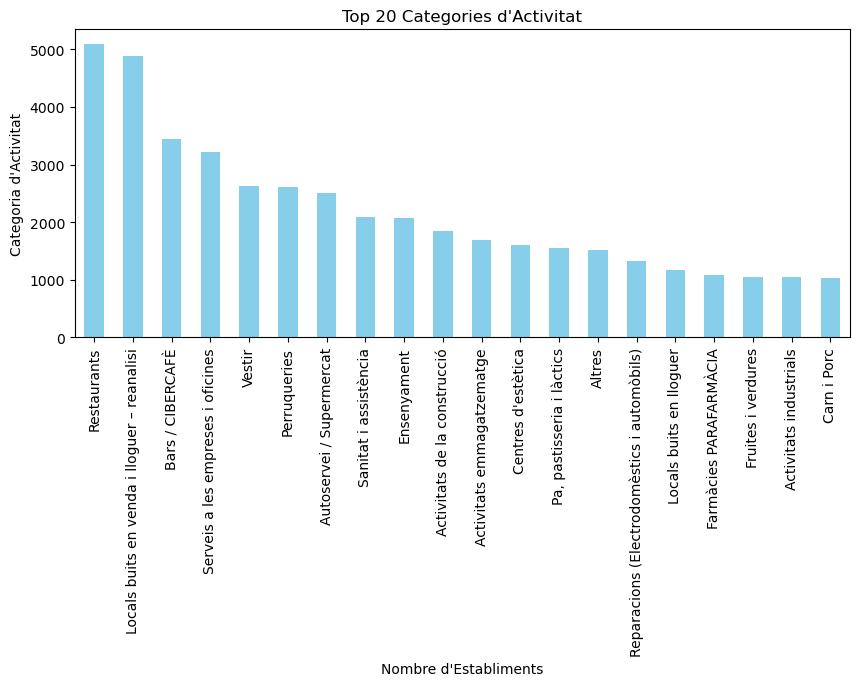

In [73]:
top_10_activitats = df_net['Nom_Activitat'].value_counts().head(20)

plt.figure(figsize=(10, 4))
top_10_activitats.plot(kind='bar', color='skyblue')
plt.title('Top 20 Categories d\'Activitat')
plt.ylabel('Categoria d\'Activitat')
plt.xlabel('Nombre d\'Establiments')
plt.xticks(rotation=90)
plt.show()


_Simplement, observem en aquest gràfic, la distribució de les primeres 20 categories d'activitat, destacant entre elles els restaurants i bars, seguit d'oficines, tendes de roba.... i altres activitats, bastant proporcionades._

### Índex d'Abastiment Comercial per Districte i Barri ###

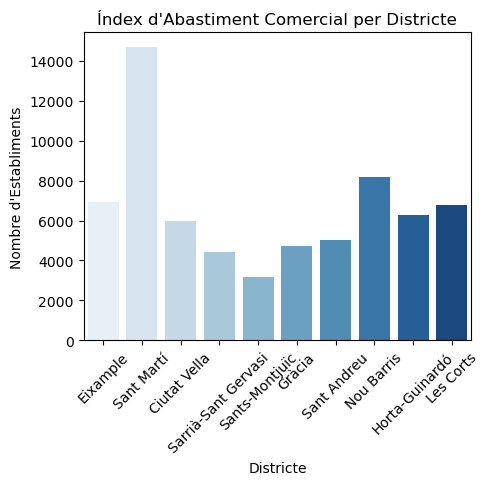

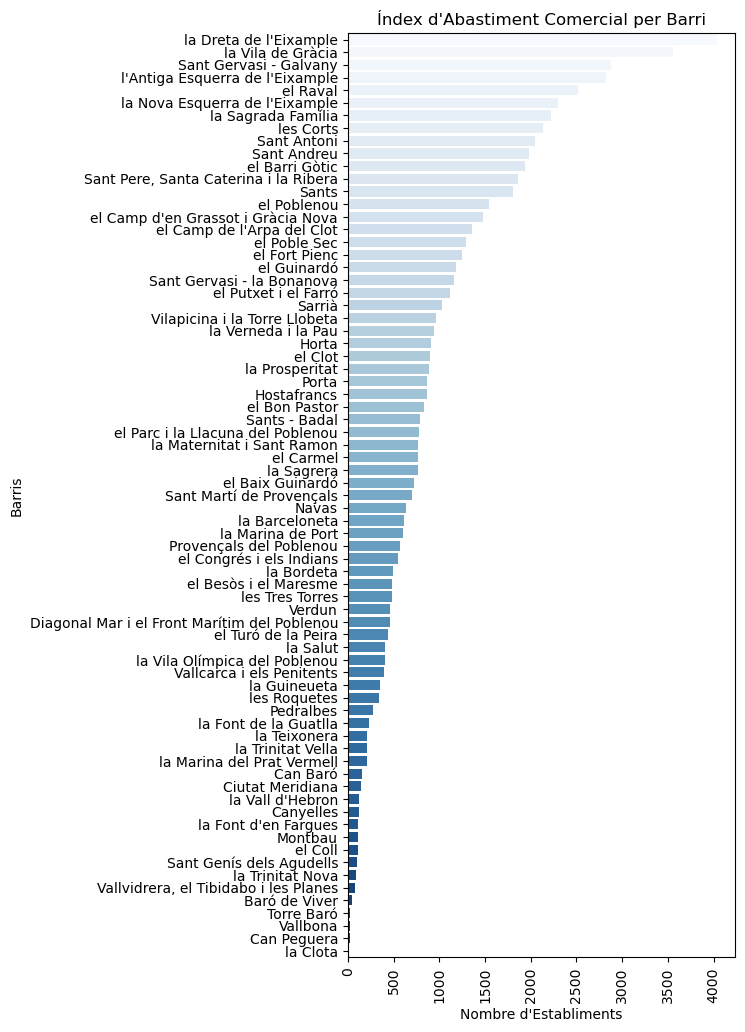

In [115]:
# Agrupar per districte i barri per obtenir el nombre d'establiments
districte_abastiment = df_net.groupby('Nom_Districte').size()
barri_abastiment = df_net.groupby('Nom_Barri').size()

districte_abastiment = df_net.groupby('Nom_Districte').size()
districte_abastiment_sorted_desc = districte_abastiment.sort_values(ascending=False)

# Mapa temàtic de densitat per districte
plt.figure(figsize=(5, 4))
sns.barplot(x=districte_abastiment_sorted_desc.index, y=districte_abastiment.values, palette='Blues')
plt.title('Índex d\'Abastiment Comercial per Districte')
plt.xlabel('Districte')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

# Ordenar els barris per nombre d'establiments de més a menys
barri_abastiment_sorted_desc = barri_abastiment.sort_values(ascending=False)

plt.figure(figsize=(5, 12))
sns.barplot(y=barri_abastiment_sorted_desc.index, x=barri_abastiment_sorted_desc.values, palette='Blues')
plt.title('Índex d\'Abastiment Comercial per Barri')
plt.xlabel('Nombre d\'Establiments')
plt.ylabel('Barris')
plt.xticks(rotation=90)
plt.show()


_Així com en el primer gràfic podem contemplar, tot i les diferències per districtes, una distribució bastant equilibrada d'abastiment comercial, podem observar en el segon gràfic, com alguns barris, tenen índex molt baixos. Tot i que també hauriem de tenir en compte el tamany de cada barri i la densitat demogràfica._

### Evolució Temporal de l'Estat d'Activitat ###

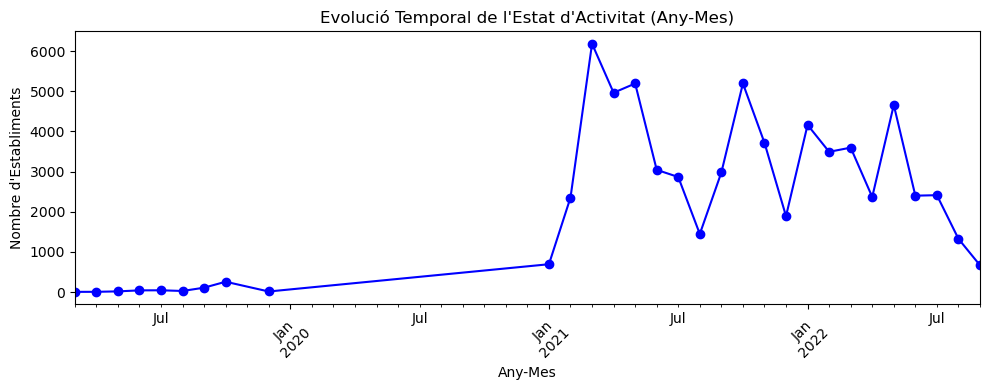

In [76]:
df_net['Any_Mes'] = df_net['Data_Revisio'].dt.to_period('M')
# Calcular el nombre d'establiments per cada mes i any
evolucio_mensual = df_net.groupby('Any_Mes').size()

# Graficar l'evolució temporal dels establiments per mes i any
plt.figure(figsize=(10, 4))
evolucio_mensual.plot(kind='line', marker='o', color='blue')
plt.title('Evolució Temporal de l\'Estat d\'Activitat (Any-Mes)')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


_Aquest gràfic mostra el canvi post-pandèmia, després de la inactivitat, mostrant un moment molt important amb l'inici d'activitat, però també mostra que cada cop, hi ha més tendència a finalitzar-la. Motiu pel qual és tant important aquest estudi._

In [77]:
df_0['Codi_Principal_Activitat'].unique()

array([1, 0], dtype=int64)

In [79]:
df_net['Nom_Principal_Activitat'].value_counts()


Nom_Principal_Activitat
Actiu                        58908
Sense activitat Econòmica     7180
Name: count, dtype: int64

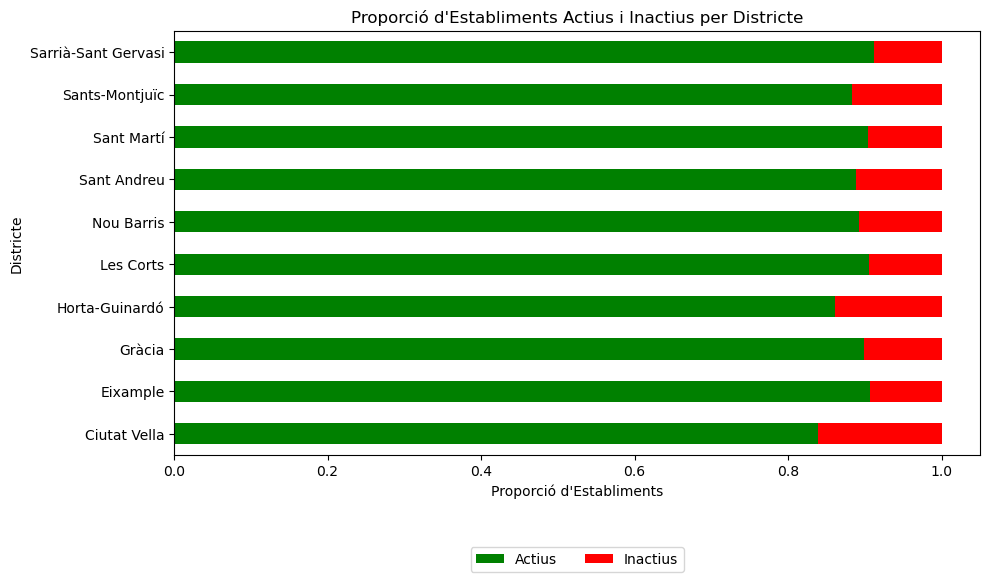

In [82]:
df_proporcio = pd.crosstab(df_net['Nom_Districte'], df_net['Nom_Principal_Activitat'])

# Ara, convertim les files a una proporció respecte al total de cada districte
df_proporcio = df_proporcio.div(df_proporcio.sum(axis=1), axis=0)

# Graficar barres horitzontals apilades
ax = df_proporcio[['Actiu', 'Sense activitat Econòmica']].plot(kind='barh', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Proporció d\'Establiments Actius i Inactius per Districte')
plt.xlabel('Proporció d\'Establiments')
plt.ylabel('Districte')

plt.legend(['Actius', 'Inactius'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.tight_layout()  # Ajustar la posició de la gràfica
plt.show()

_Les barres indiquen que tot i que hi ha molts locals en actiu, encara queda un 15% aprox inactius_

## Estructura del comerç i els serveis per sector d'activitat i districte ##

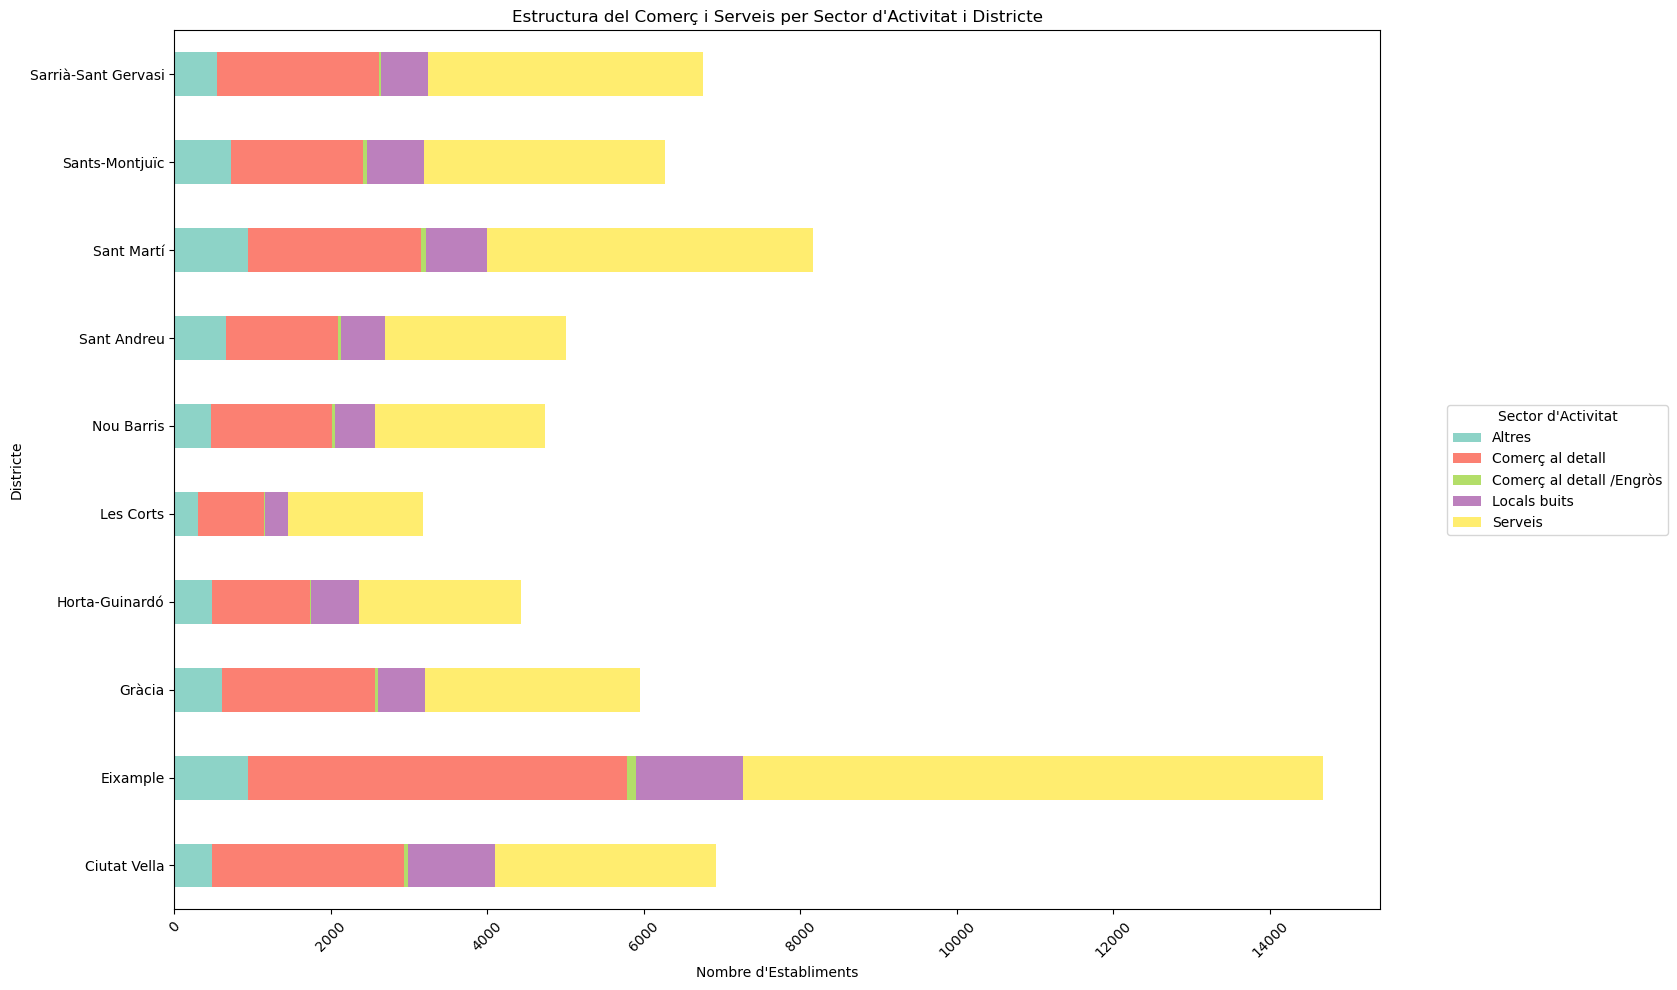

In [87]:
# Crear una taula de contingència per comptar la quantitat d'establiments per districte i sector d'activitat
df_sector_districte_count = df_sector_districte.groupby(['Nom_Districte', 'Nom_Sector_Activitat']).size().unstack(fill_value=0)

# Crear la gràfica de barres apilades
ax = df_sector_districte_count.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='Set3')

plt.title('Estructura del Comerç i Serveis per Sector d\'Activitat i Districte')
plt.xlabel('Nombre d\'Establiments')
plt.ylabel('Districte')
plt.xticks(rotation=45)  # Ajustar la rotació de l'eix X per millorar la llegibilitat
plt.tight_layout()  # Ajustar la gràfica per evitar que es sobreposi amb els límits

plt.legend(title='Sector d\'Activitat', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

_Podem apreciar que el sector Serveis, sigui quin sigui el districte, predomina. Precedit per comerç al detall._

## Algun detall més sobre l'evolució en el temps dels locals ##

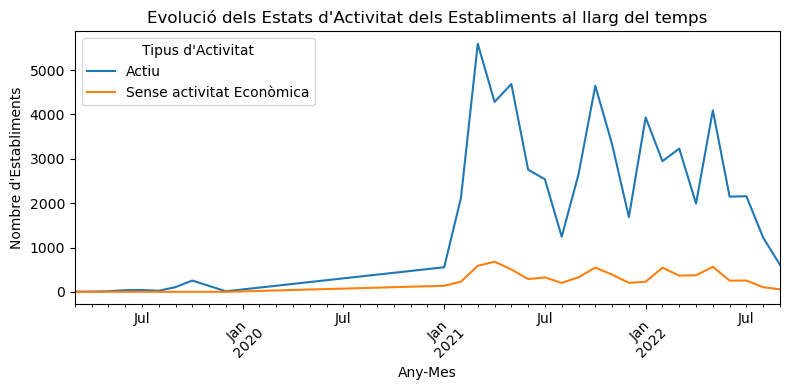

In [91]:
# Agrupar per any, mes i estat del local (actiu, inactiu, etc.)
df_net['Any_Mes'] = df_net['Data_Revisio'].dt.to_period('M')
evolucio_estat = df_net.groupby(['Any_Mes', 'Nom_Principal_Activitat']).size().unstack(fill_value=0)

# Visualitzar l'evolució temporal dels estats
evolucio_estat.plot(kind='line', figsize=(8, 4))
plt.title('Evolució dels Estats d\'Activitat dels Establiments al llarg del temps')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.legend(title='Tipus d\'Activitat')
plt.tight_layout()
plt.show()


_Observem que només hi ha 500 imputs del 2019, no n'hi ha del 2020 (covid) i veiem que la tendència és que pugen els locals sense activitat, quan pugen els que si en tenen.
Per entendre-ho millor, farem una altra gràfica solapant els mesos corresponents de cada any._

In [99]:
# Comprovar quins anys hi ha a les dades
df_net['Any'] = df_net['Data_Revisio'].dt.year
df_net['Any'].value_counts()


Any
2021    40505
2022    25071
2019      512
Name: count, dtype: int64

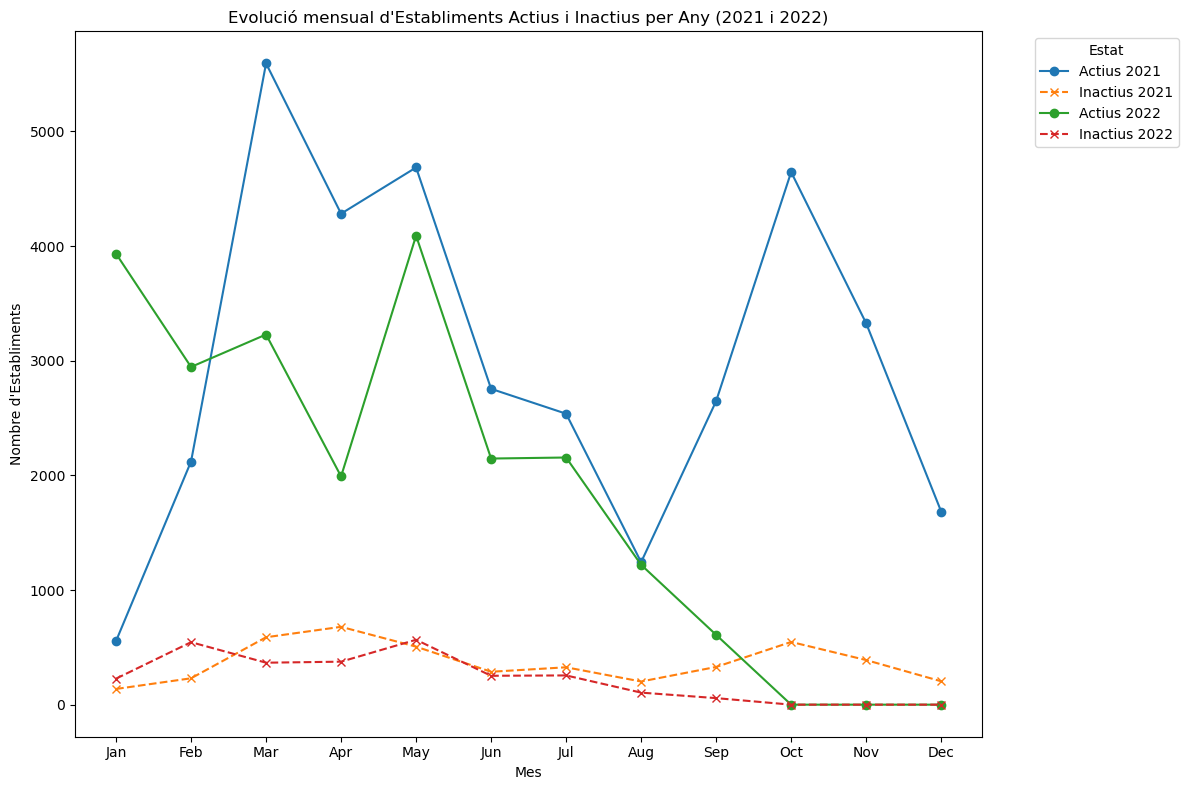

In [104]:
# Crear una nova columna per l'any i el mes
df_net['Any'] = df_net['Data_Revisio'].dt.year
df_net['Mes'] = df_net['Data_Revisio'].dt.month

# Filtrar les dades només per 2021 i 2022
df_net_filtrat = df_net[df_net['Any'].isin([2021, 2022])]

# Filtrar les dades per establiments actius i inactius
df_actius = df_net_filtrat[df_net_filtrat['Nom_Principal_Activitat'] == 'Actiu']
df_inactius = df_net_filtrat[df_net_filtrat['Nom_Principal_Activitat'] == 'Sense activitat Econòmica']

# Agrupar per any i mes i comptar els establiments actius i inactius per mes
actius_per_mes = df_actius.groupby(['Any', 'Mes']).size().unstack(fill_value=0)
inactius_per_mes = df_inactius.groupby(['Any', 'Mes']).size().unstack(fill_value=0)

# Crear la gràfica
plt.figure(figsize=(12, 8))
# Afegir línies per cada any
for year in actius_per_mes.index:
    plt.plot(actius_per_mes.columns, actius_per_mes.loc[year], label=f'Actius {year}', marker='o')
    plt.plot(inactius_per_mes.columns, inactius_per_mes.loc[year], label=f'Inactius {year}', marker='x', linestyle='--')

plt.title('Evolució mensual d\'Establiments Actius i Inactius per Any (2021 i 2022)')
plt.xlabel('Mes')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Estat', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

_Podem comprobar en alguns mesos de l'any tendències semblants, i que pugen en proporció els locals amb activitat i els que no en tenen._

Index(['Gràcia', 'Eixample', 'Sant Martí', 'Sarrià-Sant Gervasi',
       'Ciutat Vella', 'Horta-Guinardó', 'Sant Andreu', 'Les Corts',
       'Nou Barris', 'Sants-Montjuïc'],
      dtype='object', name='Nom_Districte')


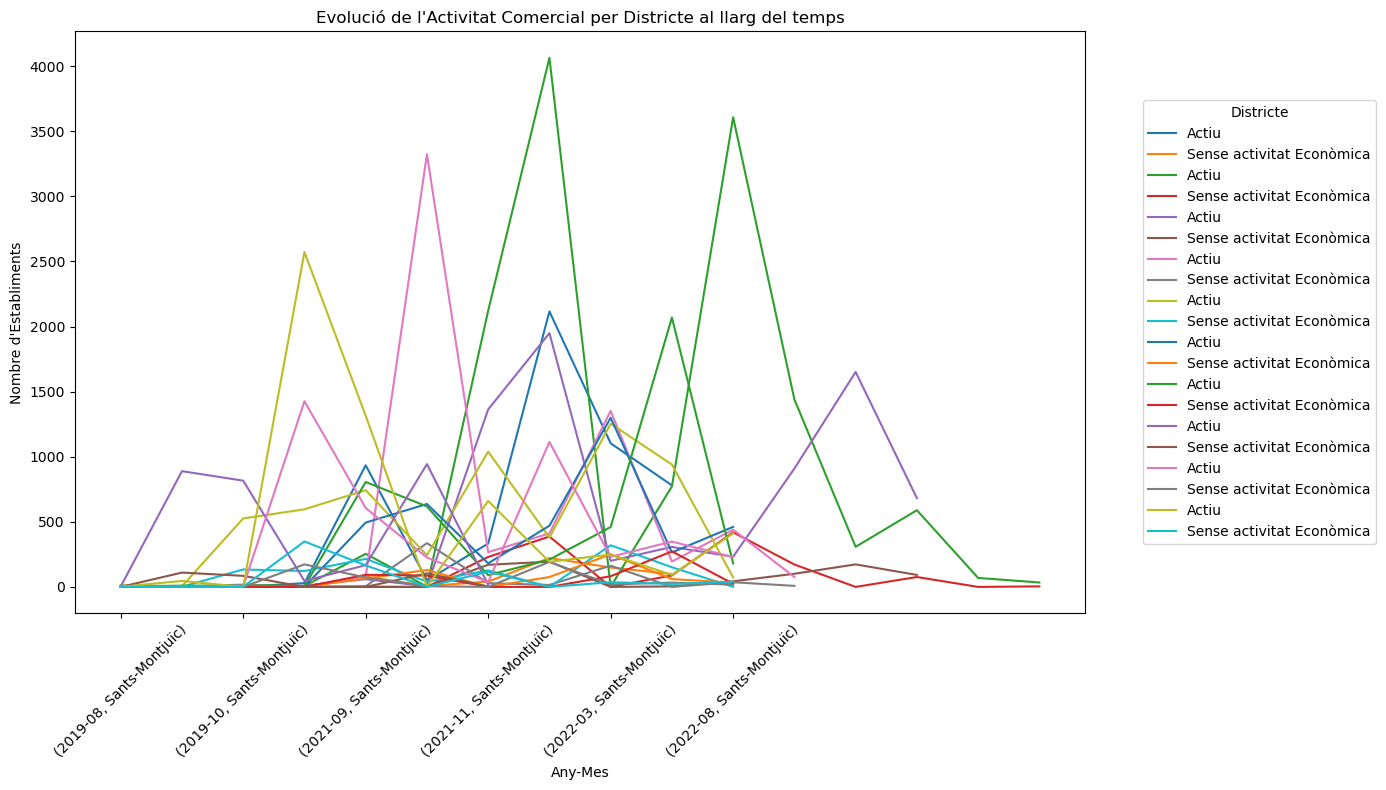

In [106]:
# Agrupar per districte, mes i any
evolucio_districte = df_net.groupby(['Any_Mes', 'Nom_Districte', 'Nom_Principal_Activitat']).size().unstack(fill_value=0)

# Comprovar quins districtes estan disponibles
print(evolucio_districte.index.get_level_values('Nom_Districte').unique())

districtes_amb_dades = evolucio_districte.index.get_level_values('Nom_Districte').unique()

plt.figure(figsize=(14, 8))
# Crear el gràfic només per districtes amb dades
for districte in districtes_amb_dades:
    evolucio_districte.loc[(slice(None), districte, slice(None)), :].plot(kind='line', ax=plt.gca(), label=districte)

plt.title('Evolució de l\'Activitat Comercial per Districte al llarg del temps')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.legend(title='Districte', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


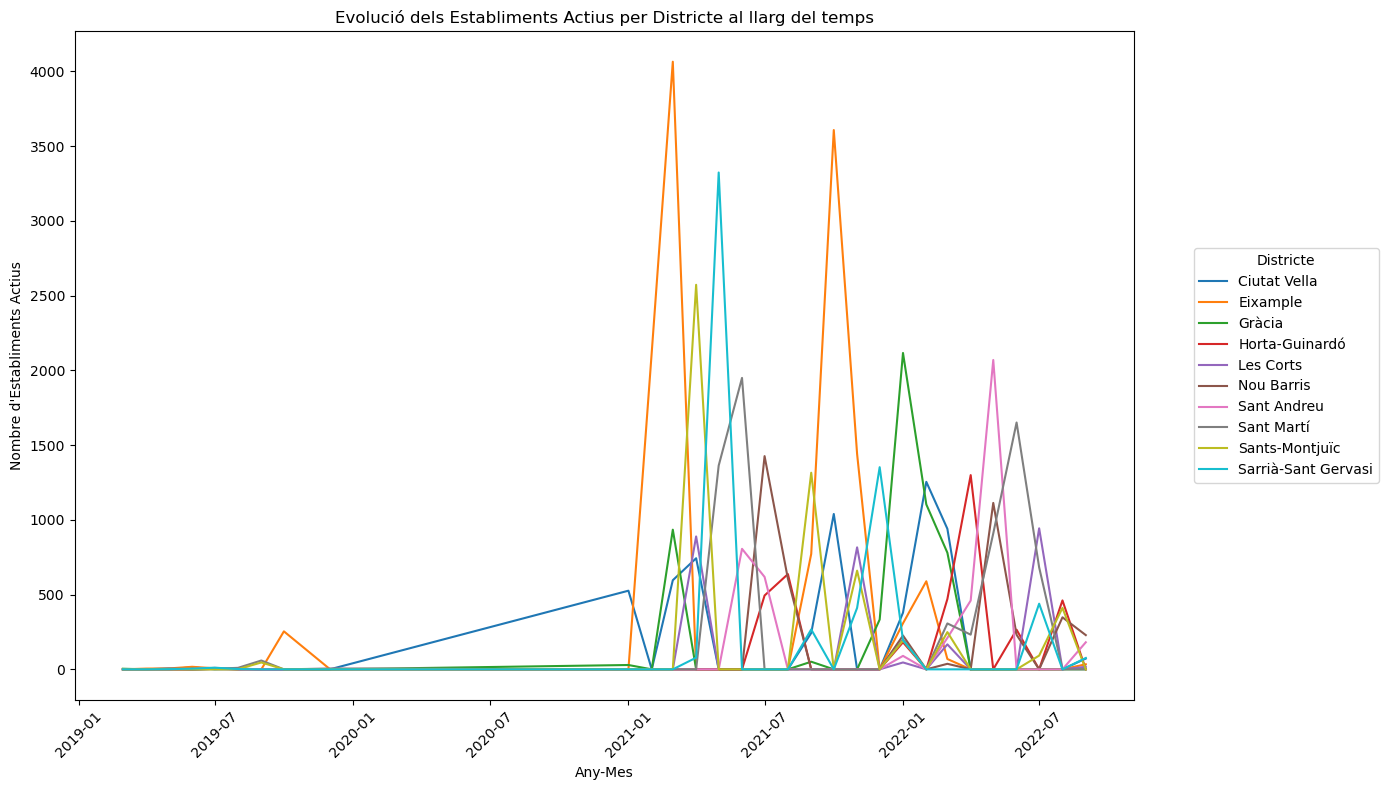

In [109]:
# Filtrar les dades per establiments actius
df_actius = df_net[df_net['Nom_Principal_Activitat'] == 'Actiu']

# Agrupar per any, mes i districte
evolucio_districte_actius = df_actius.groupby(['Any_Mes', 'Nom_Districte']).size().unstack(fill_value=0)

# Filtrar districtes disponibles (ara obtenim els districtes de les columnes)
districtes_amb_dades = evolucio_districte_actius.columns

# Convertir 'Any_Mes' a datetime
evolucio_districte_actius.index = evolucio_districte_actius.index.to_timestamp()

plt.figure(figsize=(14, 8))

# Crear el gràfic per cada districte
for districte in districtes_amb_dades:
    # Filtrar per districte i dibuixar la línia només per establiments actius
    plt.plot(evolucio_districte_actius.index, evolucio_districte_actius[districte], label=districte)

plt.title('Evolució dels Establiments Actius per Districte al llarg del temps')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments Actius')
plt.xticks(rotation=45)
plt.legend(title='Districte', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


_Contemplem els pics que de les mostres obtingudes, destacant el 2021, moment postpandemia i amb un descens en el 2022. Destaca el barri de l'Eixample que obté un descens al 2022, a diferència del barri de gràcia que el 2021 estava per sota (mensy establiments actius) que el 2022._

In [119]:
# Comptar nombre total de revisions per local
freq_activitat = df_net.groupby('ID_Global')['Nom_Principal_Activitat'].count()

# Comptar revisions actives per local
freq_actiu = df_net[df_net['Nom_Principal_Activitat'] == 'Actiu'].groupby('ID_Global').size()

# Comptar canvis d'estat (activitat o inactivitat)
df_net = df_net.sort_values(by=['ID_Global', 'Data_Revisio'])
df_net['Estat_anterior'] = df_net.groupby('ID_Global')['Nom_Principal_Activitat'].shift()
df_net['Canvi_Estat'] = (df_net['Nom_Principal_Activitat'] != df_net['Estat_anterior']).astype(int)
canvis_estat = df_net.groupby('ID_Global')['Canvi_Estat'].sum()

# Comprovar els valors parcials
print("Freqüència d'activitat per establiment:\n", freq_activitat.head())
print("Freqüència de revisió activa per establiment:\n", freq_actiu.head())
print("Nombre de canvis d'estat per establiment:\n", canvis_estat.head())

# Càlcul de Salut Comercial amb pesos
salut_comercial = (
    (freq_actiu / freq_activitat) * 0.5 +  
    (1 - (freq_activitat - freq_actiu) / freq_activitat) * 0.3 -  
    (canvis_estat / freq_activitat) * 0.2  
).fillna(0)

# Afegir Salut Comercial al dataframe
df_net['Salut_Comercial'] = df_net['ID_Global'].map(salut_comercial)

# Verificar els valors finals de Salut_Comercial
df_net[['ID_Global', 'Nom_Principal_Activitat', 'Data_Revisio', 'Salut_Comercial']].head(10)


Freqüència d'activitat per establiment:
 ID_Global
000042e5-4081-416e-835f-f525a804ec30    1
0001c1c1-b321-4916-8de8-91757198ce0e    1
0002f635-959b-40d7-b499-5d9d9e81e737    1
00040d8f-59d8-4067-9f54-01e52b293109    1
00078af4-69c6-40d4-8c9a-ef74ee4006d4    1
Name: Nom_Principal_Activitat, dtype: int64
Freqüència de revisió activa per establiment:
 ID_Global
000042e5-4081-416e-835f-f525a804ec30    1
0001c1c1-b321-4916-8de8-91757198ce0e    1
0002f635-959b-40d7-b499-5d9d9e81e737    1
00040d8f-59d8-4067-9f54-01e52b293109    1
00078af4-69c6-40d4-8c9a-ef74ee4006d4    1
dtype: int64
Nombre de canvis d'estat per establiment:
 ID_Global
000042e5-4081-416e-835f-f525a804ec30    1
0001c1c1-b321-4916-8de8-91757198ce0e    1
0002f635-959b-40d7-b499-5d9d9e81e737    1
00040d8f-59d8-4067-9f54-01e52b293109    1
00078af4-69c6-40d4-8c9a-ef74ee4006d4    1
Name: Canvi_Estat, dtype: int32


,ID_Global,Nom_Principal_Activitat,Data_Revisio,Salut_Comercial
44925,000042e5-4081-416e-835f-f525a804ec30,Actiu,2021-03-04,0.6
62645,0001c1c1-b321-4916-8de8-91757198ce0e,Actiu,2022-05-23,0.6
55623,0002f635-959b-40d7-b499-5d9d9e81e737,Actiu,2021-03-17,0.6
33228,00040d8f-59d8-4067-9f54-01e52b293109,Actiu,2021-12-10,0.6
44050,00078af4-69c6-40d4-8c9a-ef74ee4006d4,Actiu,2022-04-19,0.6
53760,0007d70b-f95d-49ea-ac57-23f5fd3b0309,Actiu,2021-04-20,0.6
53066,0007e83b-8130-495d-b86f-5440ff8cb90a,Actiu,2021-10-08,0.6
14130,00090360-776d-4c39-86f8-a82e018ec212,Actiu,2021-04-07,0.6
15768,000a3661-3456-4a6e-9e22-c07739111f8c,Actiu,2021-10-25,0.6
34128,000b5231-f0c8-405b-a8be-74ecf8ae337b,Actiu,2022-05-04,0.6


_Observem que només tenim un ítem d'estat per cada local, amb la qual cosa, no podem fer un càlcul dels canvis d'estat que ha sofert._

In [141]:
df_proces = df_net.copy()

# PRE-PROCESAMENT # 

## Estratègia per preparar les dades ##
Definir el target (variable objectiu) : columna: Codi_Principal_Activitat, doncs indica si el local està actiu o no. Aquesta columna ja està codificada com 0 per inactiu i 1 per actiu. No caldrà fer cap transformació addicional.   

Variables independents (features):
Les variables categòriques (com Nom_Barri, Nom_Districte, Nom_Sector_Activitat, Nom_Grup_Activitat etc.) les codificarem amb OneHot Encoding. 
Les variables booleanes (com SN_Oci_Nocturn, SN_Coworking, SN_Servei_Degustacio, SN_Obert24h, SN_Mixtura, SN_Carrer, SN_Mercat', SN_Galeria, SN_CComercial, SN_Eix) ja estan codificades com 0/1, així que no cal fer cap transformació.   

Tècniques a tenir en compte: 
Com hem apreciat a l'EDA, comptem amb un conjunt de dades desbalancejat sobretot en la proporció de locals Actius / inactius. I hem de tenir en compte algunes tècniques per equilibrar les classes, com:  Reamostratge (Resampling), Oversampling generar més exemples de la classe minoritària (inactiu) per equilibrar la distribució de classes, ...  Una tècnica comuna és SMOTE (Synthetic Minority Over-sampling Technique), que genera mostres sintètiques de la classe minoritària. Una altra tècnica és Cost-Sensitive Learning, tècnica modifica el model per penalitzar més els errors de predicció en la classe minoritària, fent que el model estigui més "preparat" per identificar els locals inactius.  
No cal cap escalador doncs només comptem amb numèriques booleanes.   

Models a valorar: Random Forest, LightGBM o XGBoost permeten assignar pesos més grans a la classe minoritària (inactiu) per penalitzar més les prediccions incorrectes d'aquesta classe.  

Validació creuada estratificada: la divisió dels conjunts de dades mantingui la proporció de classes (actiu/inactiu) en cada subconjunt.  
  
Mesura de rendiments: A l'hora de mesurar els resultats, no només tenir en compte la precisió (accuracy), sinó també el F1-score, recall i precisió.

In [186]:
# Llista de columnes a mantenir per crear el df per l'entrenament
columns_to_keep = [

    'Codi_Principal_Activitat', #target
    'Nom_Sector_Activitat',
    'Nom_Grup_Activitat',
    'Nom_Activitat',
    'Nom_Barri',
    'Nom_Districte',
    'SN_Oci_Nocturn',
    'SN_Coworking',
    'SN_Servei_Degustacio',
    'SN_Obert24h',
    'SN_Mixtura',
    'SN_Carrer',
    'SN_Mercat',
    'SN_Galeria',
    'SN_CComercial',
    'SN_Eix'
   
]
# Seleccionar només les columnes desitjades
df_pro = df_net[columns_to_keep]
print(df_pro.columns.tolist())


['Codi_Principal_Activitat', 'Nom_Sector_Activitat', 'Nom_Grup_Activitat', 'Nom_Activitat', 'Nom_Barri', 'Nom_Districte', 'SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'SN_Galeria', 'SN_CComercial', 'SN_Eix']


### Visualització del desbalanceig en el Target ###

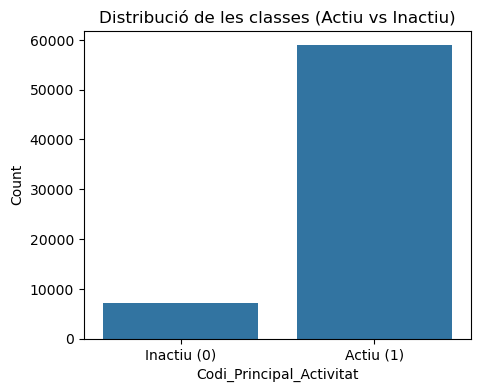

In [187]:
plt.figure(figsize=(5, 4))

# Gràfic de barres per la distribució de les classes
sns.countplot(x=y)
plt.title('Distribució de les classes (Actiu vs Inactiu)')
plt.xlabel('Codi_Principal_Activitat')
plt.ylabel('Count')
plt.xticks([0, 1], ['Inactiu (0)', 'Actiu (1)'])

plt.show()


_Tot i que ja a l'estudi EDA hem pogut observar aquest desbalanceig, aquí ho apreciem de manera més clara, per tal de confirmar les tècnique que necessitarem aplicar_

### Relació entre el Target i les columnes categòriques ###

                Feature  Chi2_Statistic       P_Value
0  Nom_Sector_Activitat    66088.000000  0.000000e+00
1    Nom_Grup_Activitat    66088.000000  0.000000e+00
2         Nom_Activitat    66088.000000  0.000000e+00
3             Nom_Barri      647.001039  2.434717e-93
4         Nom_Districte      326.022659  7.790484e-65


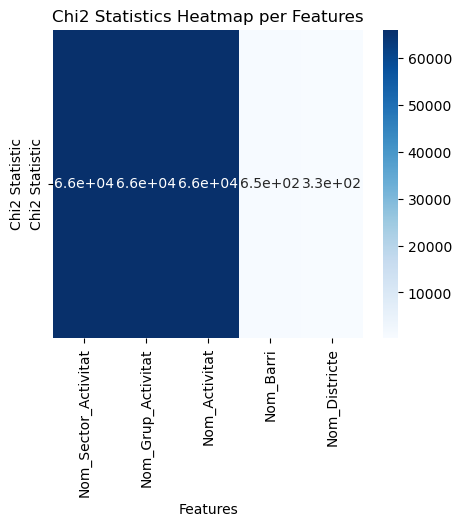

In [179]:
from scipy.stats import chi2_contingency

cat_features = ['Nom_Sector_Activitat', 'Nom_Grup_Activitat', 'Nom_Activitat', 'Nom_Barri', 'Nom_Districte']
chi2_results = []

# Iterar sobre les variables categòriques per fer el test de qui-quadrat
for feature in cat_features:
    contingency_table = pd.crosstab(df_pro[feature], y)  # Tabló de contingència
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((feature, chi2_stat, p_value))

# Mostrar els resultats
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2_Statistic', 'P_Value'])
print(chi2_df)

# Creem una matriu per a visualitzar els resultats del Chi-quadrat
chi2_matrix = chi2_df[['Chi2_Statistic']].T  # Transposem per fer que cada feature sigui una fila

# Crear el heatmap amb les estadístiques Chi2
plt.figure(figsize=(5, 4))
sns.heatmap(chi2_matrix, annot=True, cmap='Blues', cbar=True, xticklabels=chi2_df['Feature'], yticklabels=['Chi2 Statistic'])
plt.title('Chi2 Statistics Heatmap per Features')
plt.xlabel('Features')
plt.ylabel('Chi2 Statistic')
plt.show()


_Conclusió: Les variables Nom_Sector_Activitat, Nom_Grup_Activitat, i Nom_Activitat mostren una relació molt forta amb la variable objectiu. Les variables Nom_Barri i Nom_Districte també mostren una relació significativa, tot i que una mica més dèbil que les anteriors. Això vol dir que aquestes variables poden ser molt útils per a la classificació. Així, podem mantenir totes aquestes variables en el model per a la classificació._

In [183]:
# pip install lightgbm xgboost
# !pip install imbalanced-learn

### Divisió conjunt entrenament i Transformació de variables categòriques amb One-Hot Encoding ###


In [210]:
# Visualitzar les columnes després de One-Hot Encoding
print(X_encoded.columns)

# Netejar les columnes si és necessari després de l'One-Hot Encoding
X_encoded.columns = [re.sub(r'\W|^(?=\d)', '_', col) for col in X_encoded.columns]

# Comprovar les columnes després de la neteja
print(X_encoded.columns)


Index(['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h',
       'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'SN_Galeria', 'SN_CComercial',
       'SN_Eix',
       ...
       'Nom_Barri_les Tres Torres', 'Nom_Districte_Eixample',
       'Nom_Districte_Gràcia', 'Nom_Districte_Horta-Guinardó',
       'Nom_Districte_Les Corts', 'Nom_Districte_Nou Barris',
       'Nom_Districte_Sant Andreu', 'Nom_Districte_Sant Martí',
       'Nom_Districte_Sants-Montjuïc', 'Nom_Districte_Sarrià-Sant Gervasi'],
      dtype='object', length=188)
Index(['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h',
       'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'SN_Galeria', 'SN_CComercial',
       'SN_Eix',
       ...
       'Nom_Barri_les_Tres_Torres', 'Nom_Districte_Eixample',
       'Nom_Districte_Gràcia', 'Nom_Districte_Horta_Guinardó',
       'Nom_Districte_Les_Corts', 'Nom_Districte_Nou_Barris',
       'Nom_Districte_Sant_Andreu', 'Nom_Districte_Sant_Martí',
       'Nom_Dis

In [211]:
# Funció per netejar els noms de les columnes
def netejar_noms_caracteristiques(df):
    df.columns = [re.sub(r'\W|^(?=\d)', '_', col) for col in df.columns]
    return df

# Neteja el dataframe
df_pro_netejat = netejar_noms_caracteristiques(df_pro)

# Separar les característiques i el target
X = df_pro_netejat.drop(columns=['Codi_Principal_Activitat'])  # Features
y = df_pro_netejat['Codi_Principal_Activitat']  # Target

# Llistat de les columnes categòriques
cat_columns = ['Nom_Sector_Activitat', 'Nom_Grup_Activitat', 'Nom_Activitat', 'Nom_Barri', 'Nom_Districte']

# Aplicar One-Hot Encoding a les columnes categòriques
X_encoded = pd.get_dummies(X, columns=cat_columns, drop_first=True)

# Dividir les dades en conjunt d'entrenament i test (80% entrenament, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Visualitzar les mides de X_train, X_test, y_train, y_test
print("Mides dels conjunts:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Mides dels conjunts:
X_train: (52870, 188)
X_test: (13218, 188)
y_train: (52870,)
y_test: (13218,)


### Pipeline amb 3 models d'entrenament ###

In [213]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# Funció per netejar els noms de les columnes
def netejar_noms_caracteristiques(df):
    df.columns = [re.sub(r'\W|^(?=\d)', '_', col) for col in df.columns]
    return df

# Neteja el dataframe
df_pro_netejat = netejar_noms_caracteristiques(df_pro)

# Separar les característiques i el target
X = df_pro_netejat.drop(columns=['Codi_Principal_Activitat'])  # Features
y = df_pro_netejat['Codi_Principal_Activitat']  # Target

# Llistat de les columnes categòriques
cat_columns = ['Nom_Sector_Activitat', 'Nom_Grup_Activitat', 'Nom_Activitat', 'Nom_Barri', 'Nom_Districte']

# Aplicar One-Hot Encoding a les columnes categòriques
X_encoded = pd.get_dummies(X, columns=cat_columns, drop_first=True)

# Dividir les dades en conjunt d'entrenament i test (80% entrenament, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Visualitzar les mides de X_train, X_test, y_train, y_test
print("Mides dels conjunts:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Crear el pipeline amb SMOTE per balancejar les classes
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42))
])

pipeline_lgbm = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMClassifier(random_state=42))
])

# Entrenar els tres models
pipeline_rf.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)
pipeline_lgbm.fit(X_train, y_train)

# Puntuacions dels models en el conjunt de test
rf_score = pipeline_rf.score(X_test, y_test)
xgb_score = pipeline_xgb.score(X_test, y_test)
lgbm_score = pipeline_lgbm.score(X_test, y_test)

print(f"Accuracy Random Forest: {rf_score:.4f}")
print(f"Accuracy XGBoost: {xgb_score:.4f}")
print(f"Accuracy LightGBM: {lgbm_score:.4f}")


Mides dels conjunts:
X_train: (52870, 188)
X_test: (13218, 188)
y_train: (52870,)
y_test: (13218,)
[LightGBM] [Info] Number of positive: 47126, number of negative: 47126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 94252, number of used features: 181
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

_Ens trobem amb un model massa ajustat, el que m'obliga a pendre la decisió, en primer lloc, d'eliminar les columnes amb massa correlació. Posteriorment, si seguim tenint problemes, buscaré altres maneres_

In [218]:
# Seleccionar les columnes desitjades
df_new = df_pro[['Codi_Principal_Activitat', 'Nom_Districte', 'Nom_Grup_Activitat', 
                 'SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 
                 'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 
                 'SN_Galeria', 'SN_CComercial', 'SN_Eix']]

# Visualitzar les primeres files per comprovar
print(df_new.head())

       Codi_Principal_Activitat        Nom_Districte      Nom_Grup_Activitat  \
44925                         1               Gràcia                  Altres   
62645                         1           Nou Barris                  Altres   
55623                         1             Eixample                  Altres   
33228                         1  Sarrià-Sant Gervasi  Quotidià no alimentari   
44050                         1          Sant Andreu     Parament de la llar   

       SN_Oci_Nocturn  SN_Coworking  SN_Servei_Degustacio  SN_Obert24h  \
44925               0             0                     0            0   
62645               0             0                     0            0   
55623               0             0                     0            0   
33228               0             0                     0            0   
44050               0             0                     0            0   

       SN_Mixtura  SN_Carrer  SN_Mercat  SN_Galeria  SN_CComercial  SN_Eix

# Filtrar les columnes numèriques i d'objecte
X_new_numerical = df_new_encoded.select_dtypes(include=['int64', 'float64'])
X_new_object = df_new_encoded.select_dtypes(include=['object'])

# Aplicar One-Hot Encoding només a les columnes d'objecte (Nom_Grup_Activitat, Nom_Barri, etc.)
X_new_object_encoded = pd.get_dummies(X_new_object, drop_first=True)

# Unir les columnes numèriques i les columnes codificades
X_new_final = pd.concat([X_new_numerical, X_new_object_encoded], axis=1)

# Separar les característiques i el target
y_new = df_new_encoded['Codi_Principal_Activitat']  # Target

# Dividir les dades en conjunt d'entrenament i test (80% entrenament, 20% test)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_final, y_new, test_size=0.2, random_state=42, stratify=y_new)

# 1. Entrenament amb Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Random Forest: {accuracy_rf:.4f}')

# 2. Entrenament amb XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy XGBoost: {accuracy_xgb:.4f}')

# 3. Entrenament amb LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_params = {
    'objective': 'binary',  # Si és un problema binari
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_lgb = [1 if x > 0.5 else 0 for x in y_pred_lgb]  # Convertim les probabilitats en prediccions de classes
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'Accuracy LightGBM: {accuracy_lgb:.4f}')

# Filtrar les columnes numèriques i d'objecte
X_new_numerical = df_new_encoded.select_dtypes(include=['int64', 'float64'])
X_new_object = df_new_encoded.select_dtypes(include=['object'])

# Aplicar One-Hot Encoding només a les columnes d'objecte (Nom_Grup_Activitat, Nom_Barri, etc.)
X_new_object_encoded = pd.get_dummies(X_new_object, drop_first=True)

# Unir les columnes numèriques i les columnes codificades
X_new_final = pd.concat([X_new_numerical, X_new_object_encoded], axis=1)

# Separar les característiques i el target
y_new = df_new_encoded['Codi_Principal_Activitat']  # Target

# Dividir les dades en conjunt d'entrenament i test (80% entrenament, 20% test)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_final, y_new, test_size=0.2, random_state=42, stratify=y_new)

# Crear el pipeline amb SMOTE per balancejar les classes
pipeline_rf_new = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline_xgb_new = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
])

pipeline_lgbm_new = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lgbm', lgb.LGBMClassifier(random_state=42))
])

# Entrenar els tres models
pipeline_rf_new.fit(X_train_new, y_train_new)
pipeline_xgb_new.fit(X_train_new, y_train_new)
pipeline_lgbm_new.fit(X_train_new, y_train_new)

# Puntuacions dels models en el conjunt de test
rf_score_new = pipeline_rf_new.score(X_test_new, y_test_new)
xgb_score_new = pipeline_xgb_new.score(X_test_new, y_test_new)
lgbm_score_new = pipeline_lgbm_new.score(X_test_new, y_test_new)

print(f"Accuracy Random Forest: {rf_score_new:.4f}")
print(f"Accuracy XGBoost: {xgb_score_new:.4f}")
print(f"Accuracy LightGBM: {lgbm_score_new:.4f}")


In [228]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Global                 66088 non-null  object 
 1   ID_Bcn_2016               58019 non-null  float64
 2   Codi_Principal_Activitat  66088 non-null  int64  
 3   Nom_Principal_Activitat   66088 non-null  object 
 4   Codi_Sector_Activitat     66088 non-null  int64  
 5   Nom_Sector_Activitat      66088 non-null  object 
 6   Codi_Grup_Activitat       66088 non-null  int64  
 7   Nom_Grup_Activitat        66088 non-null  object 
 8   Codi_Activitat_2022       66088 non-null  int64  
 9   Nom_Activitat             66088 non-null  object 
 10  Codi_Activitat_2016       66088 non-null  object 
 11  Nom_Local                 66088 non-null  object 
 12  SN_Oci_Nocturn            66088 non-null  object 
 13  SN_Coworking              66088 non-null  object 
 14  SN_Ser